# Introduction to Artificial Neural Networks

CSI 4106 - Fall 2024

Marcel Turcotte  
Version: Oct 10, 2024 09:06

a3
- can read one paragraph and do the whole assignment. "we provide three datasets, the training set includes..."
- data already split
- all attributes numbers between 0 and 1, no need to scale
- simple problem, basically a cipher problem. 20 letters to fewer letters

# Preamble

## Quote of the Day

The [Nobel Prize in Physics
2024](https://www.nobelprize.org/prizes/physics/2024/summary/) was
awarded to [John J.
Hopfield](https://en.wikipedia.org/wiki/John_Hopfield) and [Geoffrey E.
Hinton](https://www.cs.toronto.edu/~hinton/) “for foundational
discoveries and inventions that enable machine learning with artificial
neural networks”

## Learning objectives

-   **Explain** perceptrons and MLPs: structure, function, history, and
    limitations.
-   **Describe** activation functions: their role in enabling complex
    pattern learning.
-   **Implement** a feedforward neural network with Keras on
    Fashion-MNIST.
-   **Interpret** neural network training and results: visualization and
    evaluation metrics.
-   **Familiarize** with deep learning frameworks: PyTorch, TensorFlow,
    and Keras for model building and deployment.

As stated at the beginning of this course, there are two primary schools
of thought in artificial intelligence: **symbolic AI** and
**connectionism**. While the symbolic approach initially dominated the
field, the connectionist approach is now more prevalent. We will now
focus on **connectionism**.

# Introduction

## Neural Networks (NN)

We now shift our focus to a family of **machine learning models** that
draw inspiration from the structure and function of **biological neural
networks** found in animals.

AKA **artificial neural networks** or **neural nets**, abbreviated as
ANN or NN.

## Machine Learning Problems

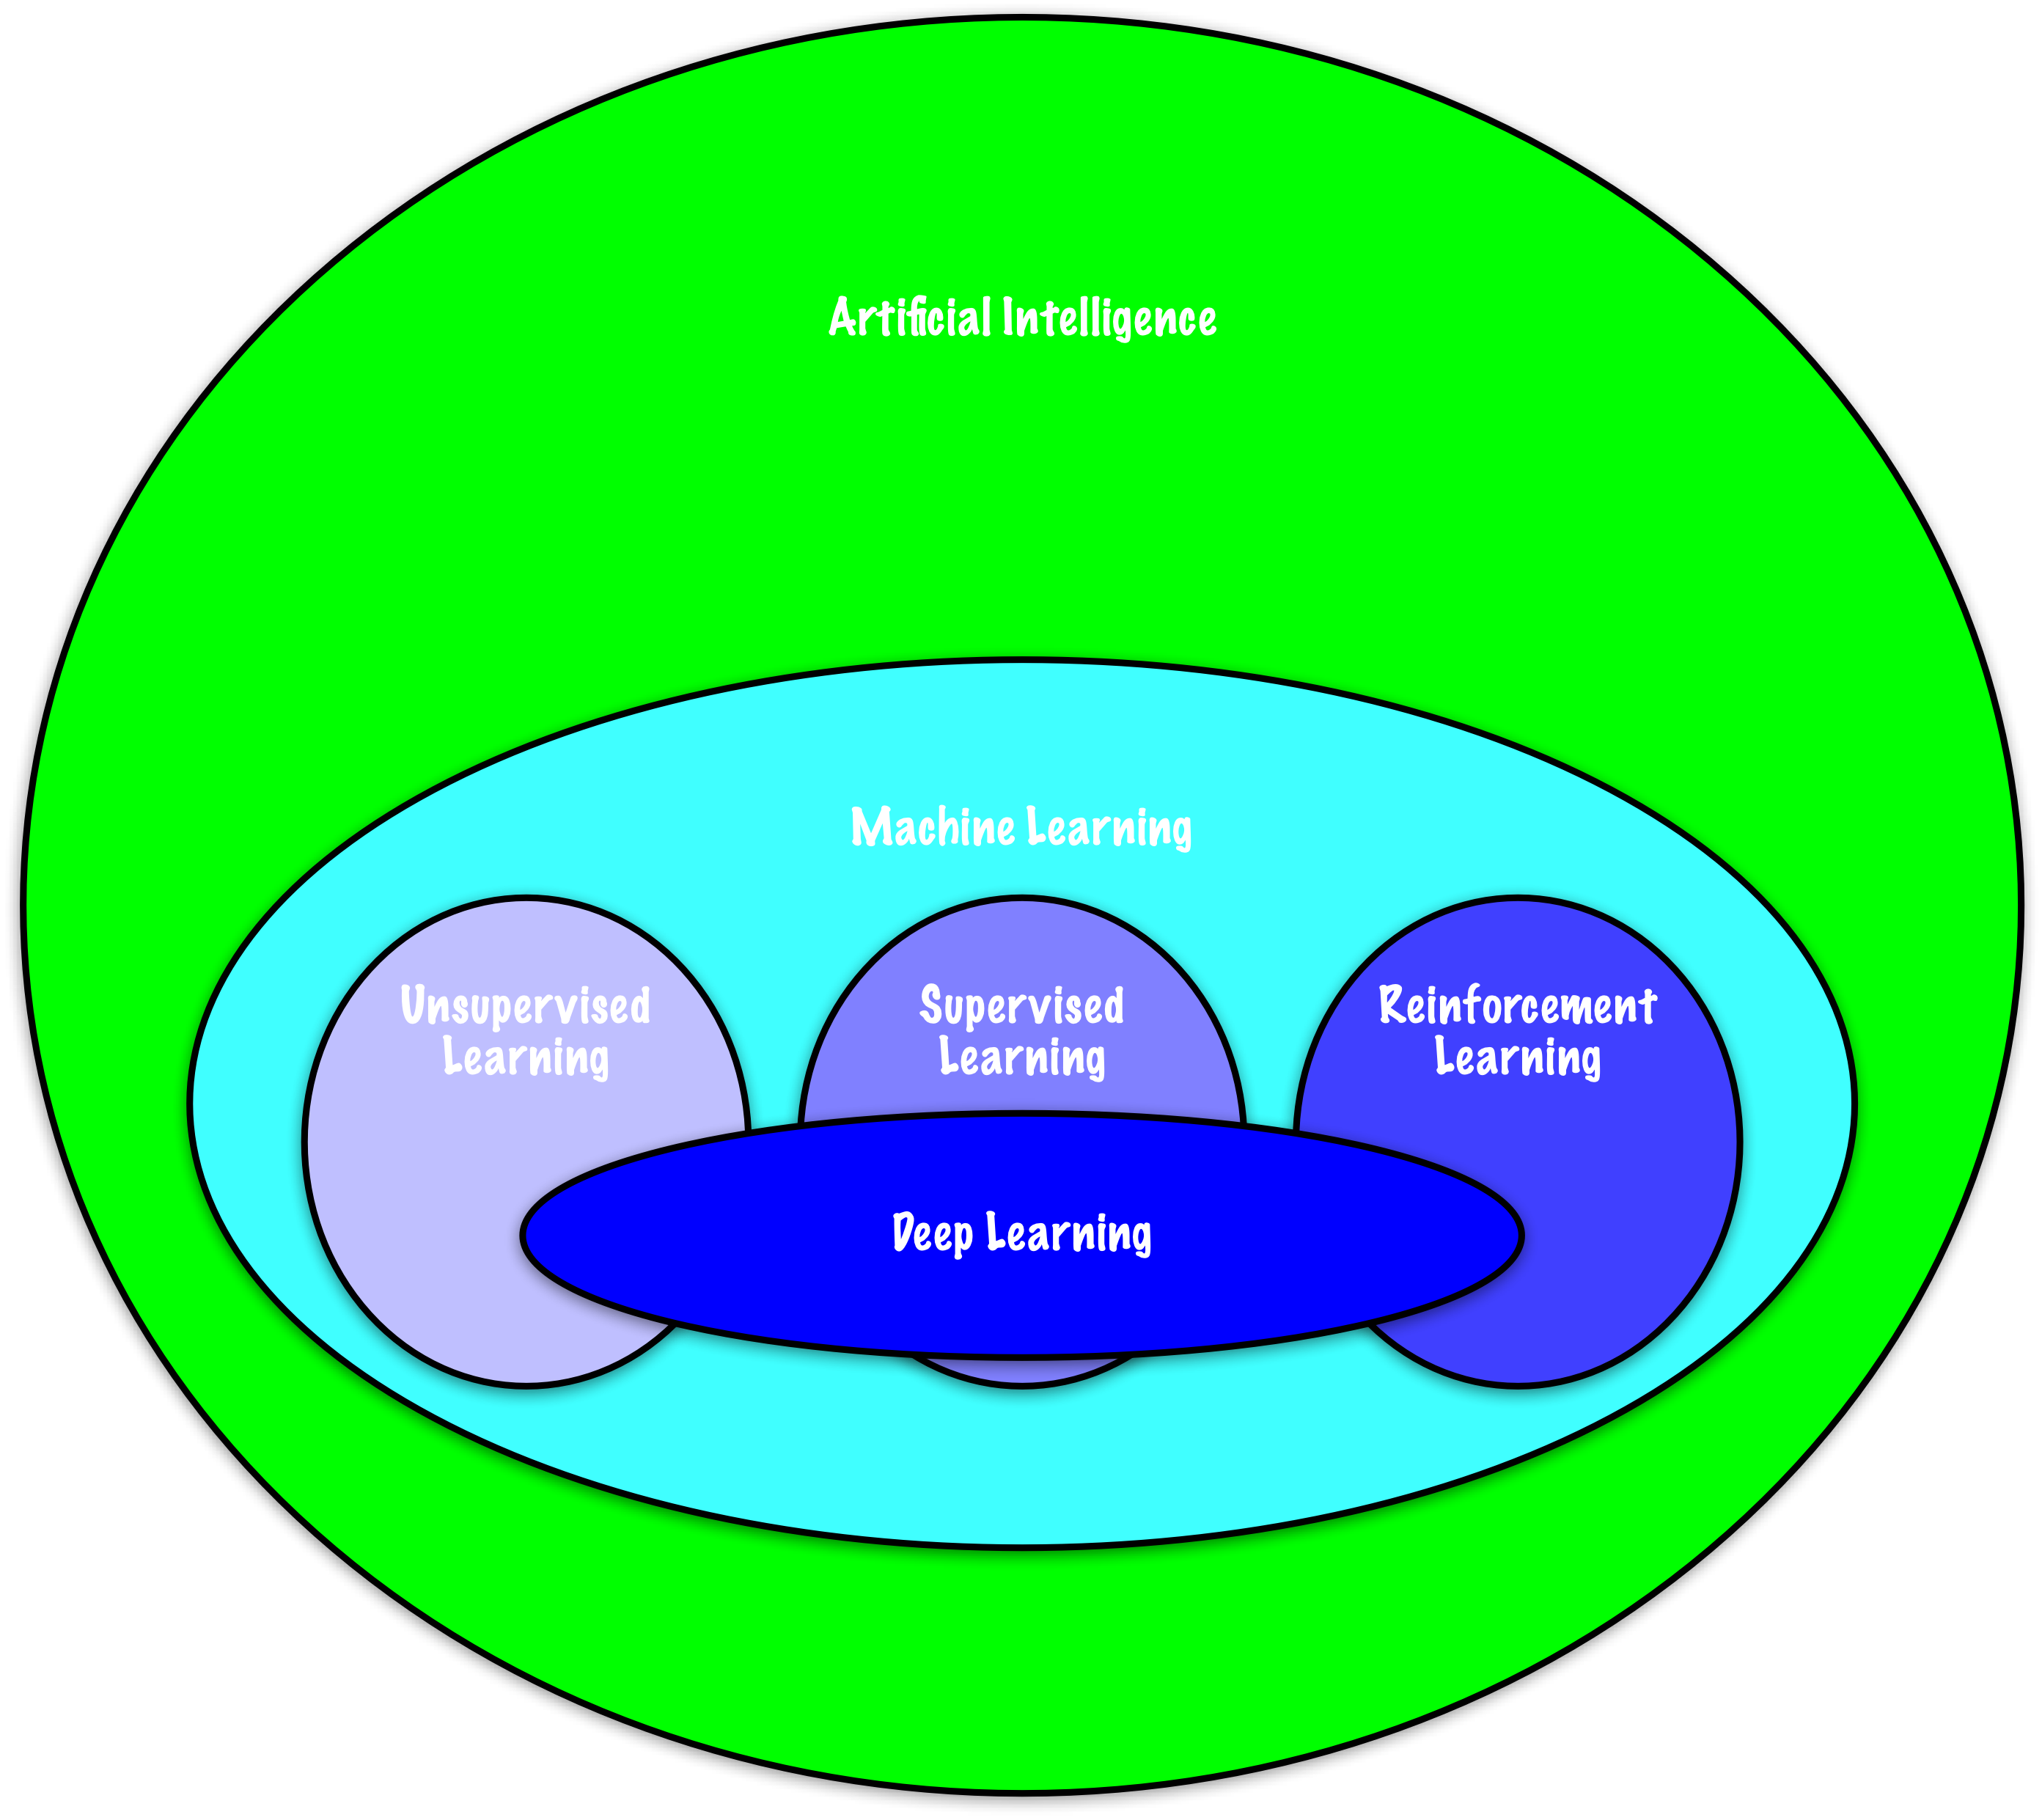

-   **Supervised Learning**: Classification, Regression

-   **Unsupervised Learning**: Autoencoders, Self-Supervised

-   **Reinforcement Learning**: Now an Integral Component

We will begin our exploration within the framework of supervised
learning.

## A neuron

![](https://upload.wikimedia.org/wikipedia/commons/3/36/Components_of_neuron.jpg)

**Attribution:** Jennifer Walinga, [CC BY-SA
4.0](https://creativecommons.org/licenses/by-sa/4.0)

In the study of artificial intelligence, it is logical to derive
inspiration from the most well-understood form of intelligence: the
human brain. The brain is composed of a complex network of neurons,
which together form biological neural networks. Although each neuron
exhibits relatively simple behavior, it is connected to thousands of
other neurons, contributing to the intricate functionality of these
networks.

A neuron can be conceptualized as a basic computational unit, and the
complexity of brain function arises from the interconnectedness of these
units.

Yann LeCun and other researchers have frequently noted that artificial
neural networks used in machine learning resemble biological neural
networks in much the same way that an airplane’s wings resemble those of
a bird.

## Interconnected neurons

<https://youtu.be/uDnHOUPRTYM>

**Attribution**: [Molecular Mechanism of Synaptic
Function](https://www.biointeractive.org/classroom-resources/molecular-mechanism-synaptic-function)
from the Howard Hughes Medical Institute (HHMI). Published on YouTube on
2018-11-15.

From biology, we essentially adopt the concept of simple computational
units that are interconnected to form a network, which collectively
performs complex computations.

While research into understanding biological neural networks is
undeniably important, the field of artificial neural networks has
incorporated only a limited number of key concepts from this research.

## Connectionist

![](https://raw.githubusercontent.com/alexlenail/NN-SVG/master/example.svg)

**Attribution**: LeNail, (2019). NN-SVG: Publication-Ready Neural
Network Architecture Schematics. Journal of Open Source Software, 4(33),
747, https://doi.org/10.21105/joss.00747
([GitHub](https://github.com/alexlenail/NN-SVG))

Another characteristic of biological neural networks that we adopt is
the organization of neurons into layers, particularly evident in the
cerebral cortex.

The term “connectionists” comes from the idea that nodes in these models
are interconnected. Instead of being explicitly programmed, these models
learn their behavior through training. Deep learning is a connectionist
approach.

**Neural networks** (**NNs**) consist of layers of **interconnected
nodes (neurons)**, each **connection** having an associated **weight**.

Neural networks process input data through these weighted connections,
and **learning** occurs by **adjusting the weights** based on **errors**
in the **training data**.

## Hierarchy of concepts

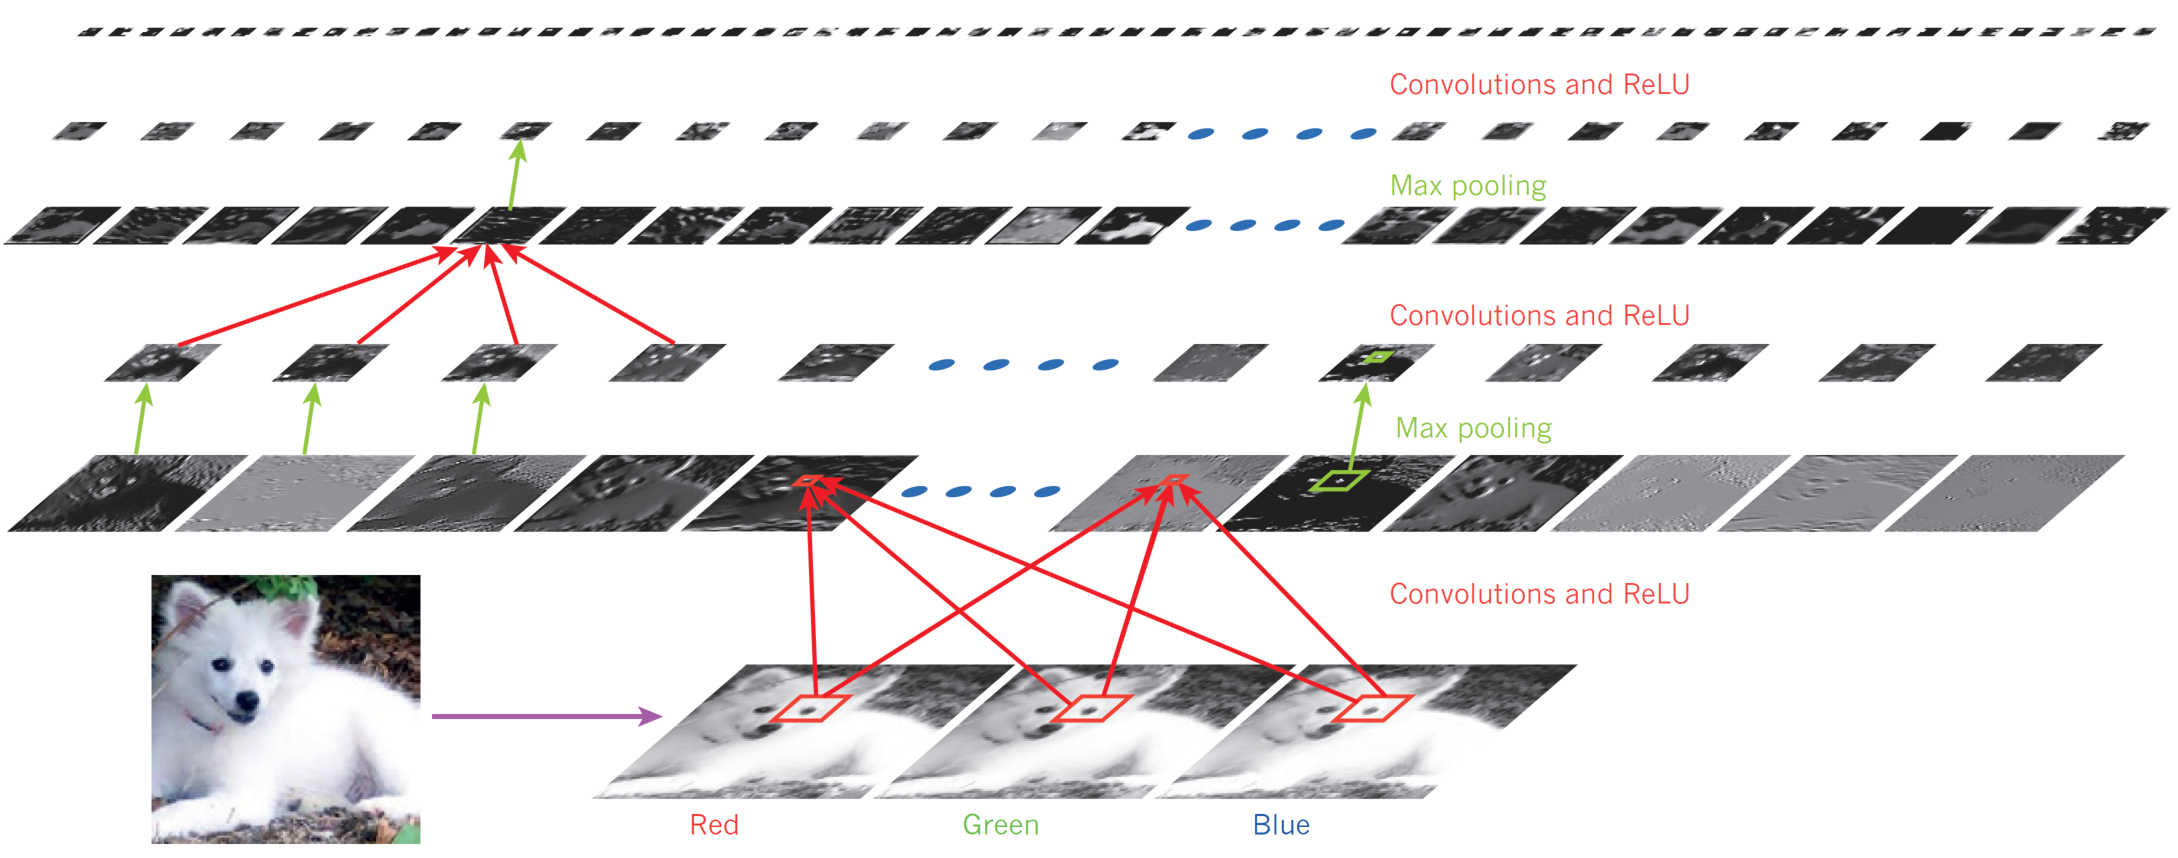

**Attribution**: LeCun, Bengio, and Hinton (2015)

In the book “Deep Learning” (Goodfellow, Bengio, and Courville 2016),
authors Goodfellow, Bengio, and Courville define deep learning as a
subset of machine learning that enables computers to “understand the
world in terms of a hierarchy of concepts.”

This hierarchical approach is one of deep learning’s most significant
contributions. It reduces the need for manual feature engineering and
redirects the focus toward the engineering of neural network
architectures.

# Basics

## Computations with neurodes

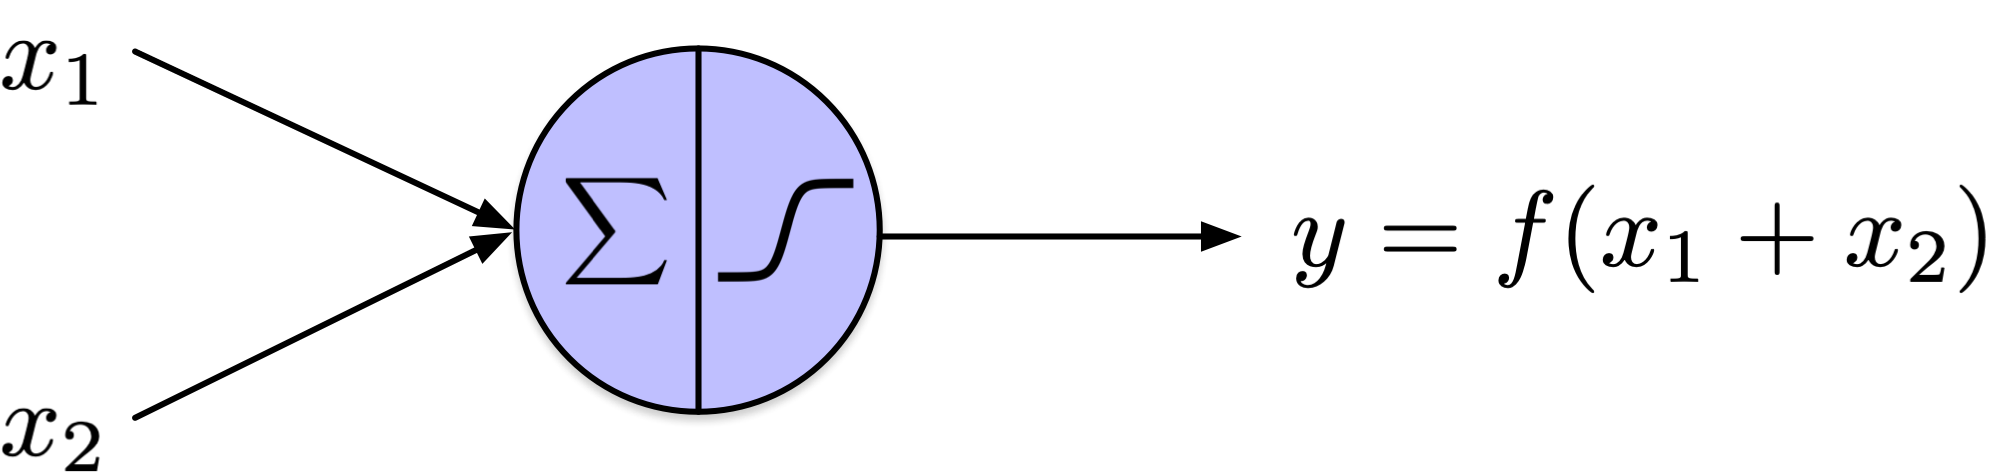

where $x_1, x_2 \in \{0,1\}$ and $f(z)$ is an **indicator function**: $$
f(z)= \begin{cases}0, & z<\theta \\ 1, & z \geq \theta\end{cases}
$$

McCulloch and Pitts (1943) termed artificial neurons, **neurodes**, for
**“neuron”** + **“node”**.

In mathematics, $f(z)$, as defined above, is known as an **indicator
function** or a **characteristic function**.

These neurodes have one or more binary inputs, taking a value of 0 or 1,
and one binary output.

They showed that such units could implement Boolean functions such as
**AND**, **OR**, and **NOT**.

But also that networks of such units can compute any logical
proposition.

## Computations with neurodes

$$
y = f(x_1 + x_2)= \begin{cases}0, & x_1 + x_2 <\theta \\ 1, & x_1 + x_2 \geq \theta\end{cases}
$$

-   With $\theta = 2$, the neurode implements an **AND** logic gate.

-   With $\theta = 1$, the neurode implements an **OR** logic gate.

More **complex logic** can be constructed by multiplying the inputs by
**-1**, which is interpreted as **inhibitory**. Namely, this allows
building a logical NOT.

With $\theta = 1$, \$x_1 {1} and $x_2$ multiplied by (-1), $y = 0$ when
$x_2 = 1$, $y = 1$, if $x_2 = 0$.

$$
y = f(x_1 + (-1) x_2)= \begin{cases}0, & x_1 + x_2 <\theta \\ 1, & x_1 + (-1) x_2 \geq \theta\end{cases}
$$

Neurons can be broadly categorized into two primary types:
**excitatory** and **inhibitory**.

## Computations with neurodes

-   **Digital computations** can be broken down into a **sequence of
    logical operations**, enabling neurode networks to **execute any
    computation**.

-   McCulloch and Pitts (1943) did **not** focus on **learning**
    parameter $\theta$.

-   They introduced a machine that **computes any function** but
    **cannot learn**.

From this work, we take the idea that networks of such units perform
computations. Signal propagates from one end of the network to compute a
result.

## Threshold logic unit

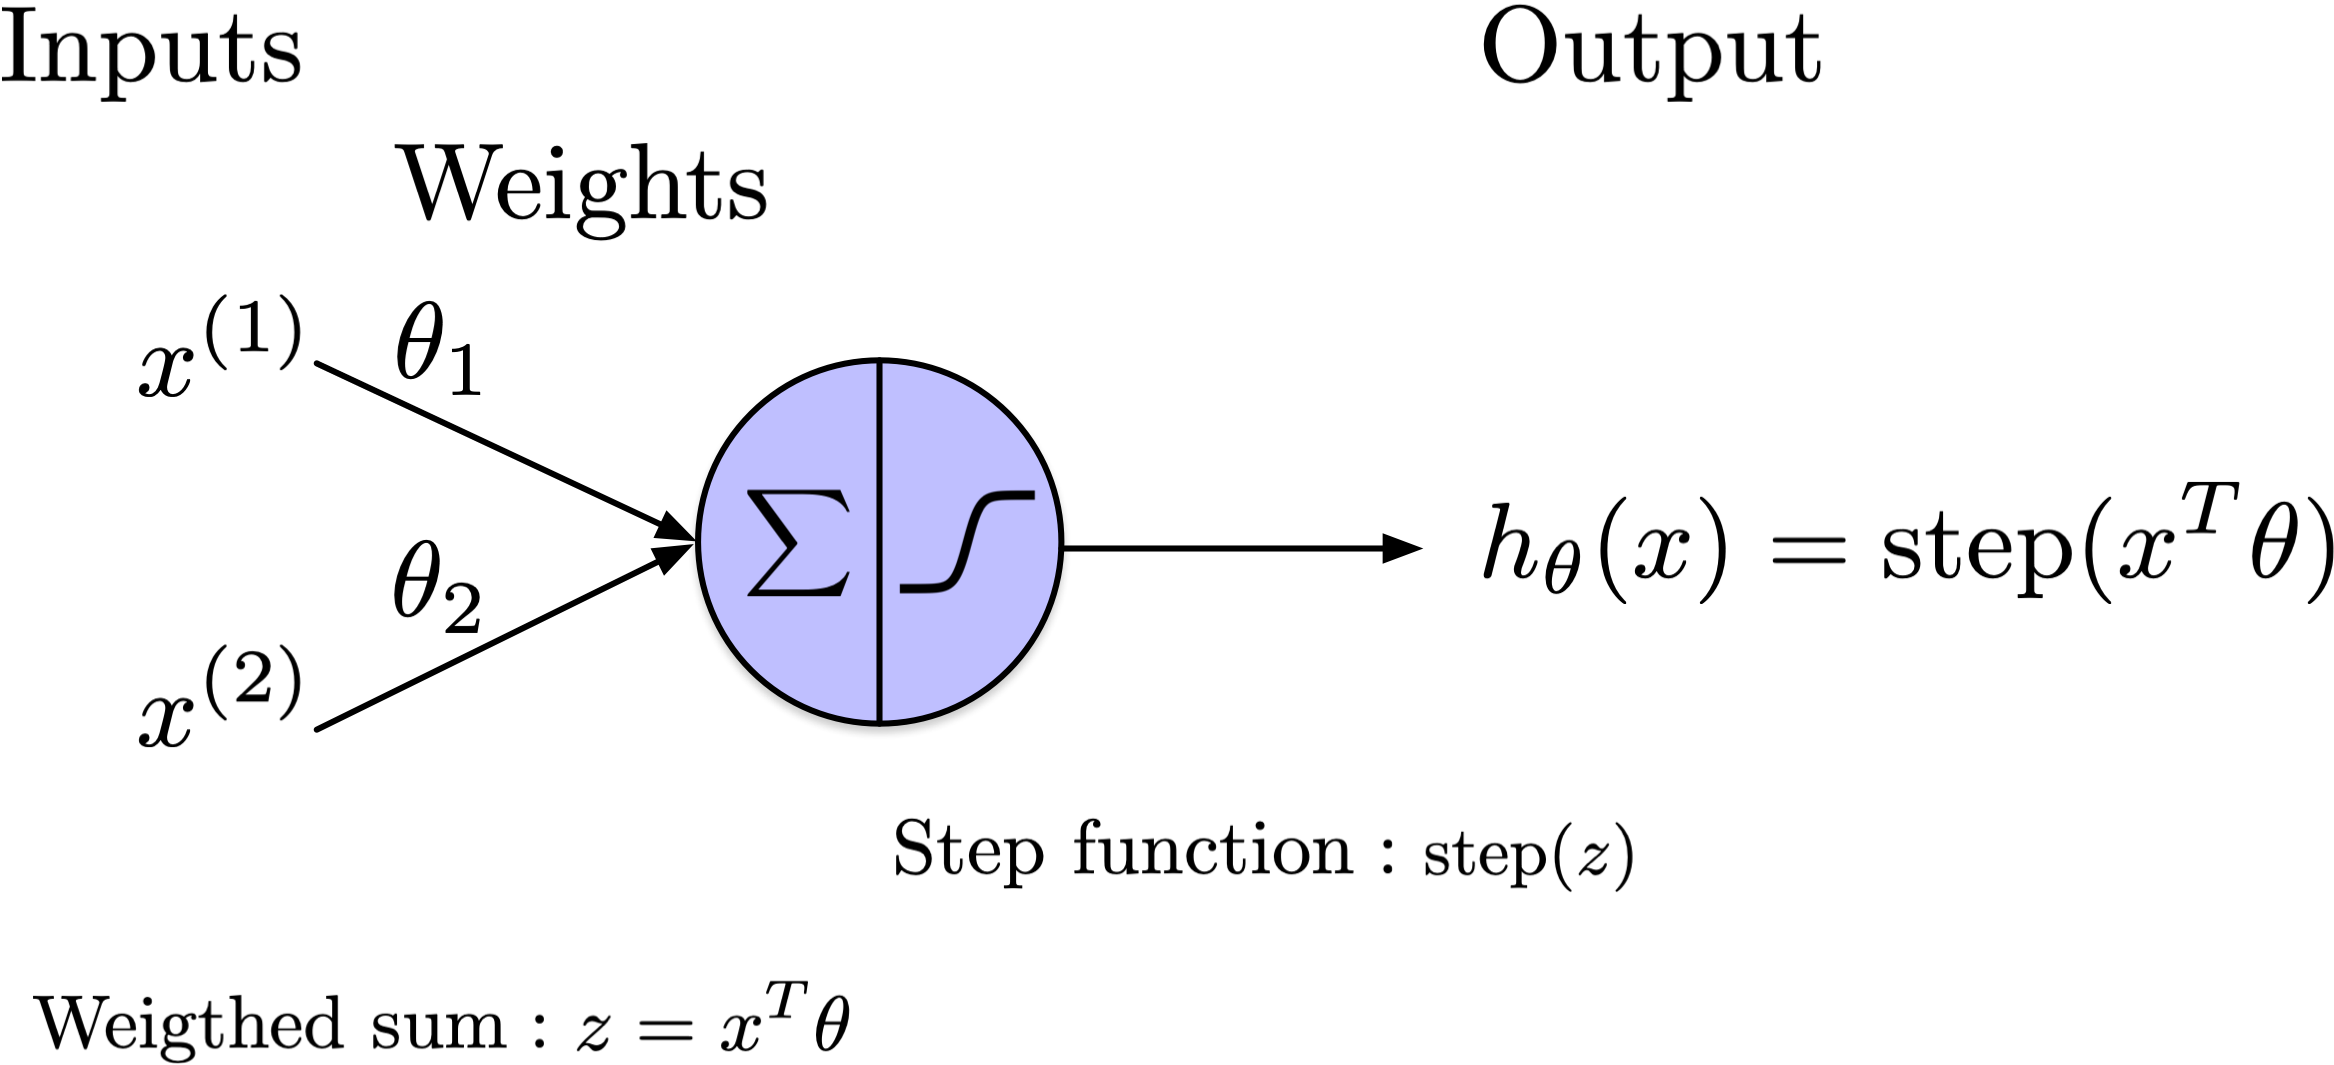

Rosenblatt (1958)

In 1957, Frank Rosenblatt developed a conceptually distinct model of a
neuron known as the **threshold logic unit**, which he published in
1958.

In this model, both the inputs and the output of the neuron are
represented as **real values**. Notably, each input connection has an
associated weight.

The left section of the neuron, denoted by the sigma symbol, represents
the computation of a weighted sum of its inputs, expressed as
$\theta_1 x_1 + \theta_2 x_2 + \ldots + \theta_D x_D + b$.

This sum is then processed through a step function, right section of the
neuron, to generate the output.

Here, $x^T \theta$ represents the dot product of two vectors: $x$ and
$\theta$. Here, $x^T$ denotes the transpose of the vector $x$,
converting it from a row vector to a column vector, allowing the dot
product operation to be performed with the vector $\theta$.

The dot product $x^T \theta$ is then a scalar given by:

$$
x^T \theta = x^{(1)} \theta_1 + x^{(2)} \theta_2 + \cdots + x_{(D)} \theta_D
$$

where $x^{(j)}$ and $theta_j$ are the components of the vectors $x$ and
$\theta$, respectively.

## Simple Step Functions

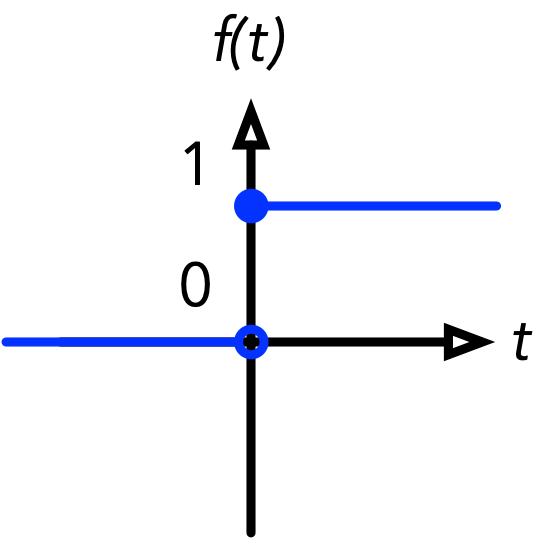

**$\text{heaviside}(t)$ =**

-   1, if $t \geq 0$

-   0, if $t < 0$

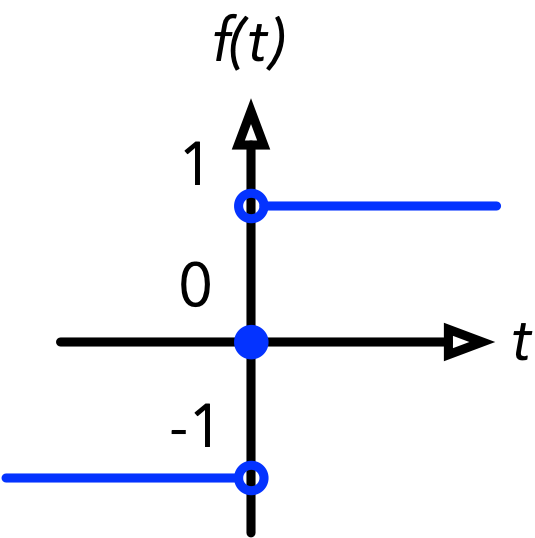

**$\text{sign}(t)$ =**

-   1, if $t > 0$

-   0, if $t = 0$

-   -1, if $t < 0$

Common **step functions** include the **heavyside function** (0 if the
input is negative and 1 otherwise) or the **sign** function (-1 if the
input is negative, 0 if the input is zero, 1 otherwise).

## Notation

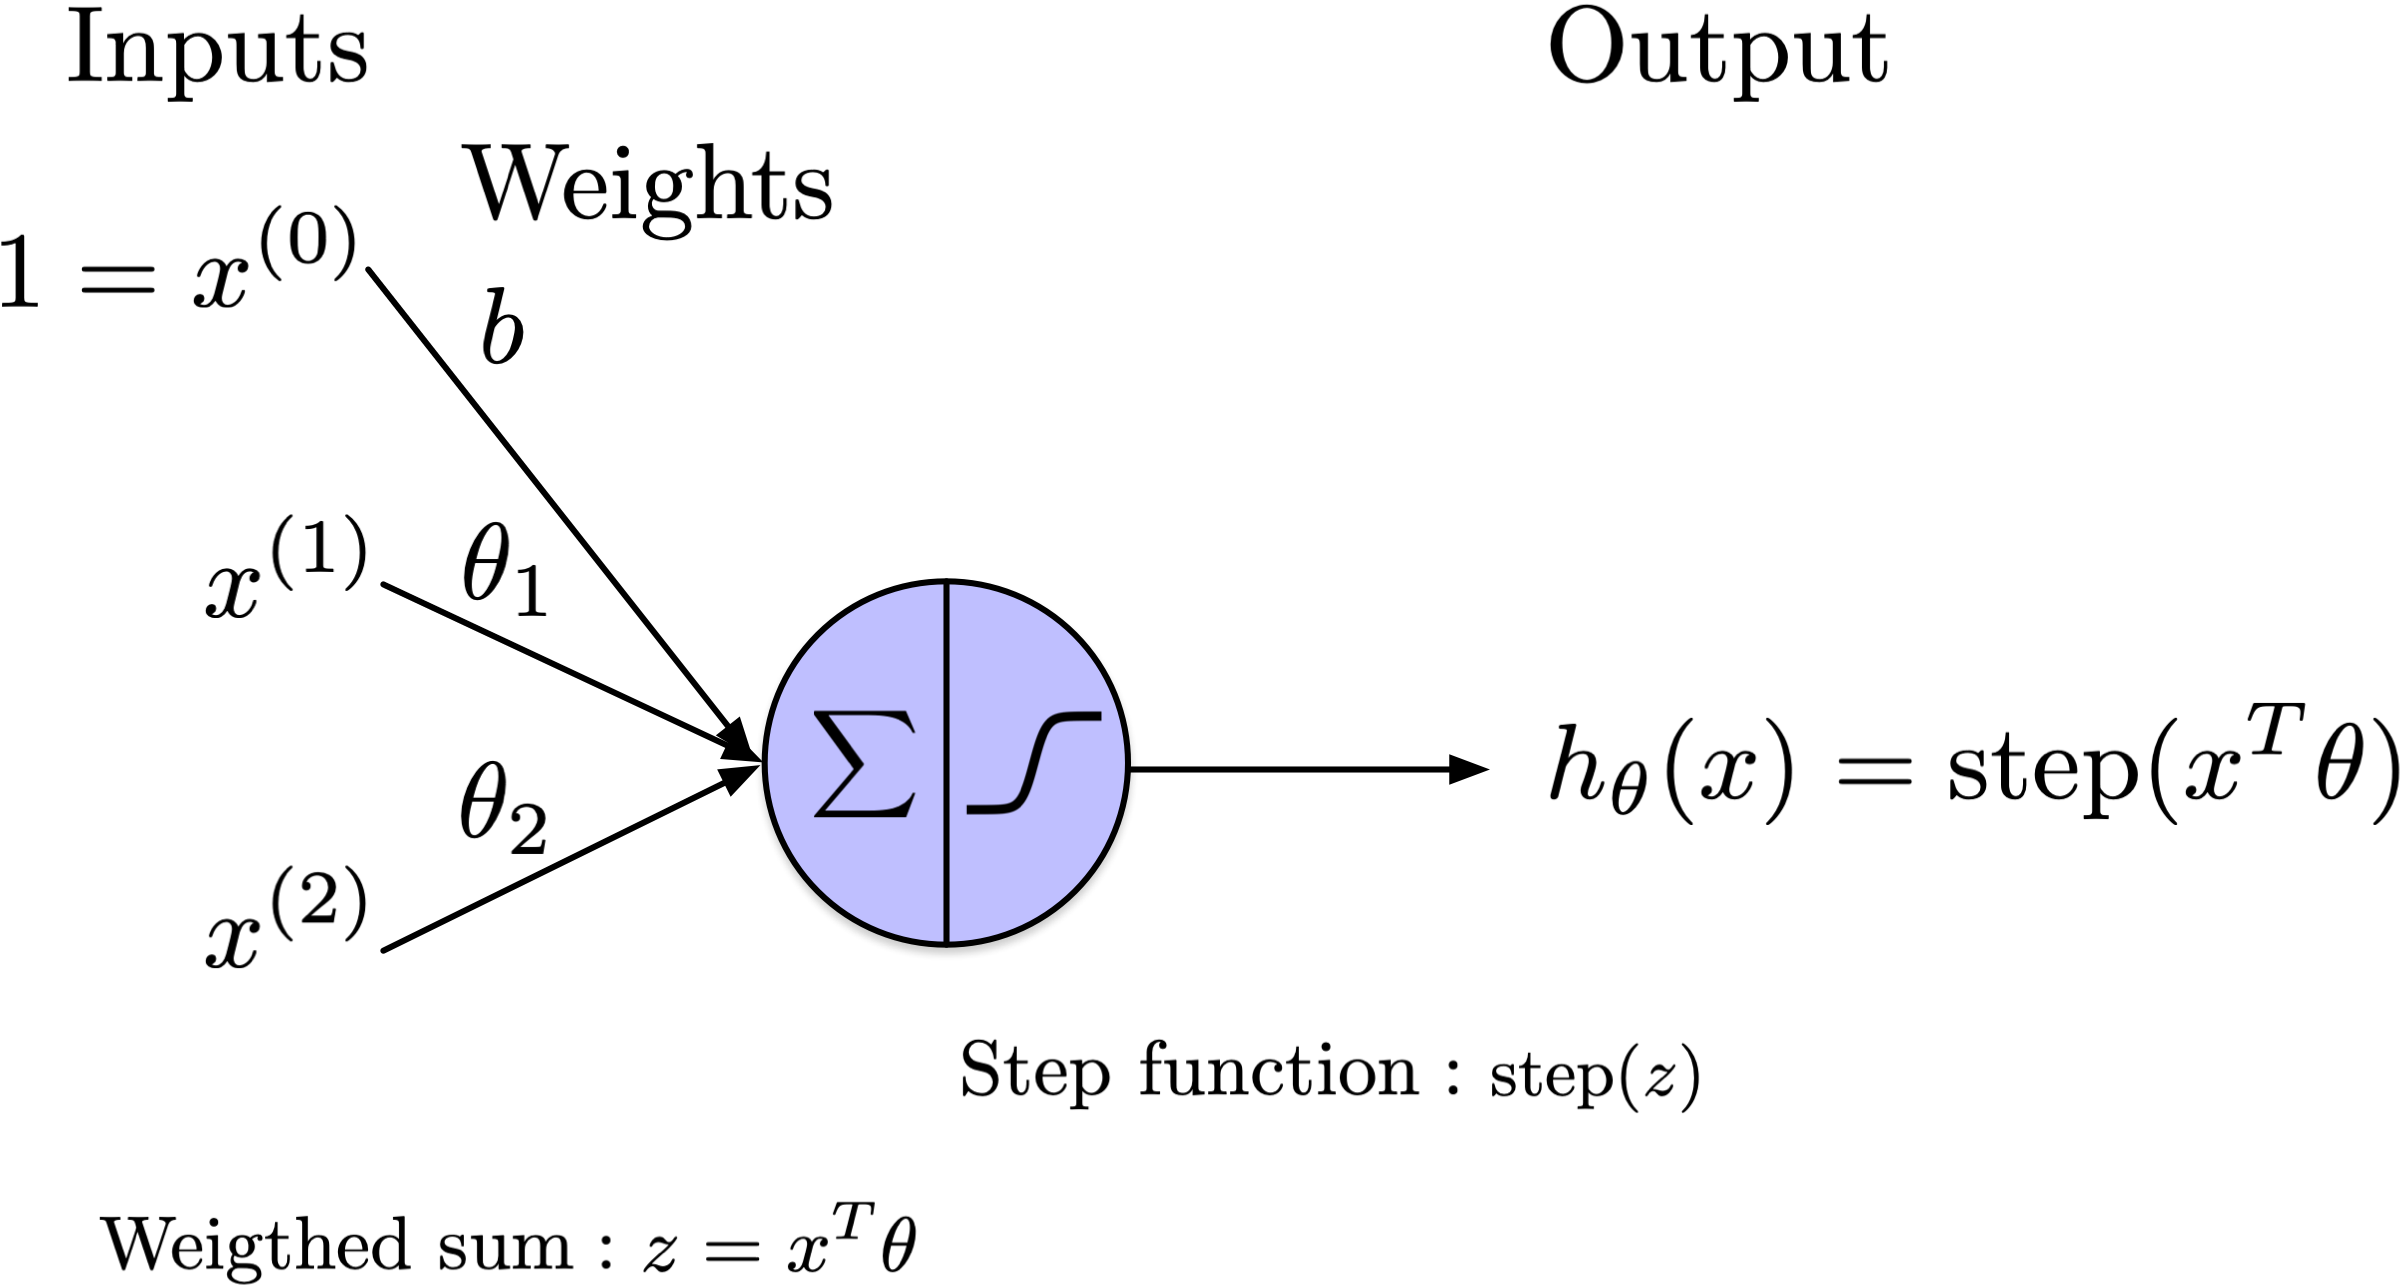

Add an extra feature with a fixed value of 1 to the input. Associate it
with weight $b = \theta_{0}$, where $b$ is the bias/intercept term.

## Notation

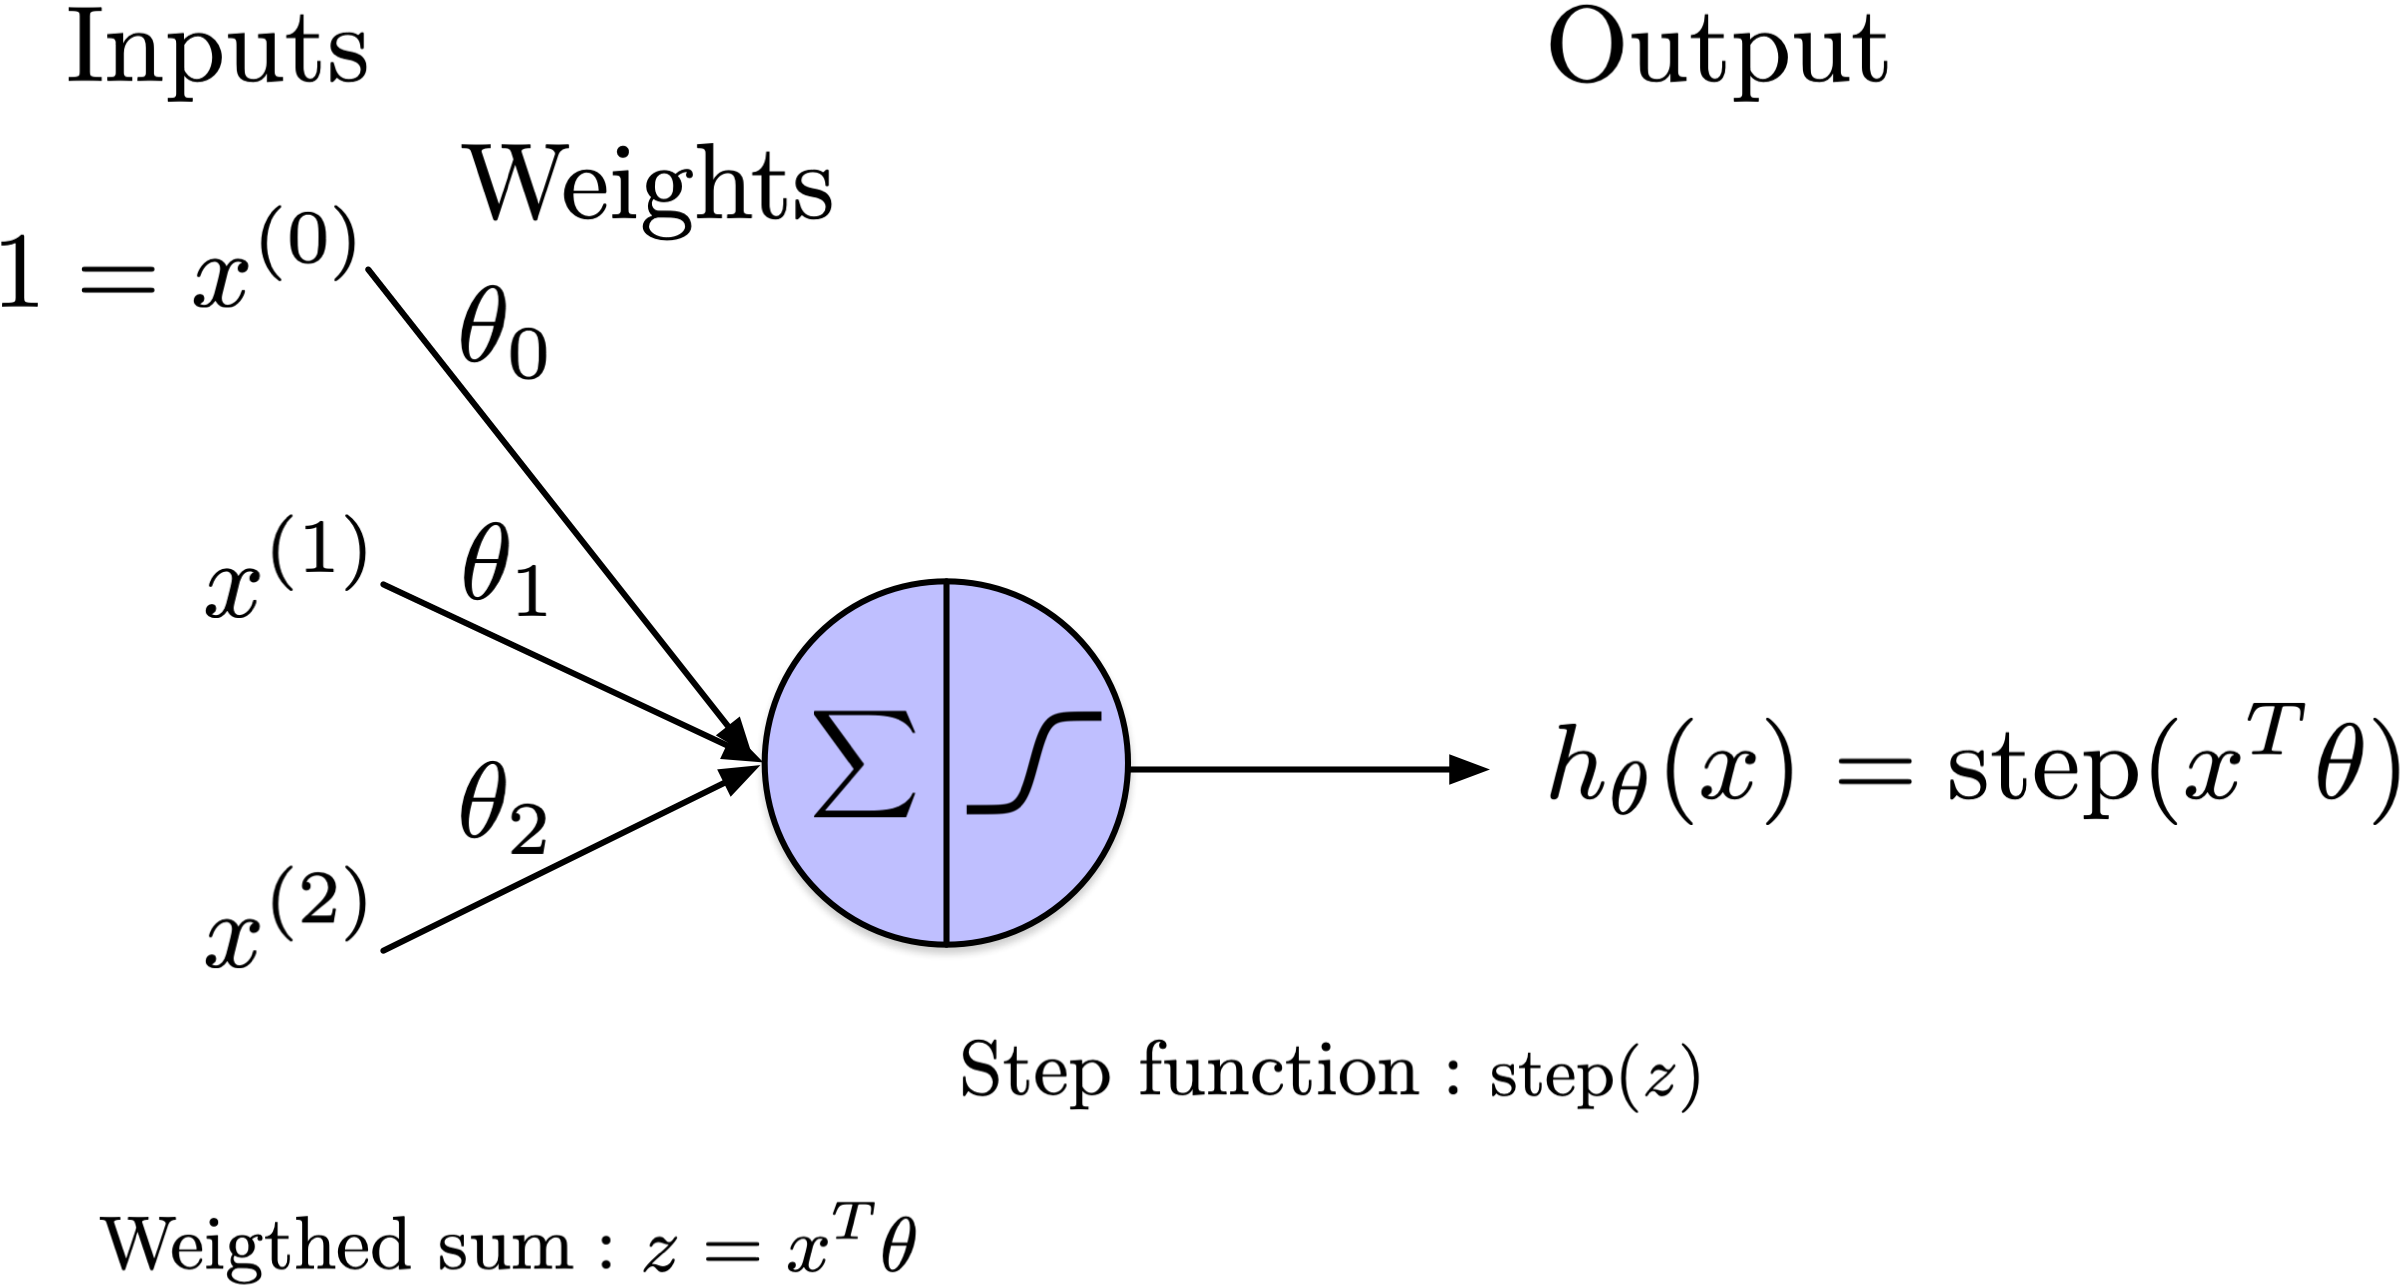

$\theta_{0} = b$ is the bias/intercept term.

The threshold logic unit is analogous to logistic regression, with the
primary distinction being the substitution of the logistic (sigmoid)
function with a step function. Similar to logistic regression, the
perceptron is employed for classification tasks.

## Perceptron

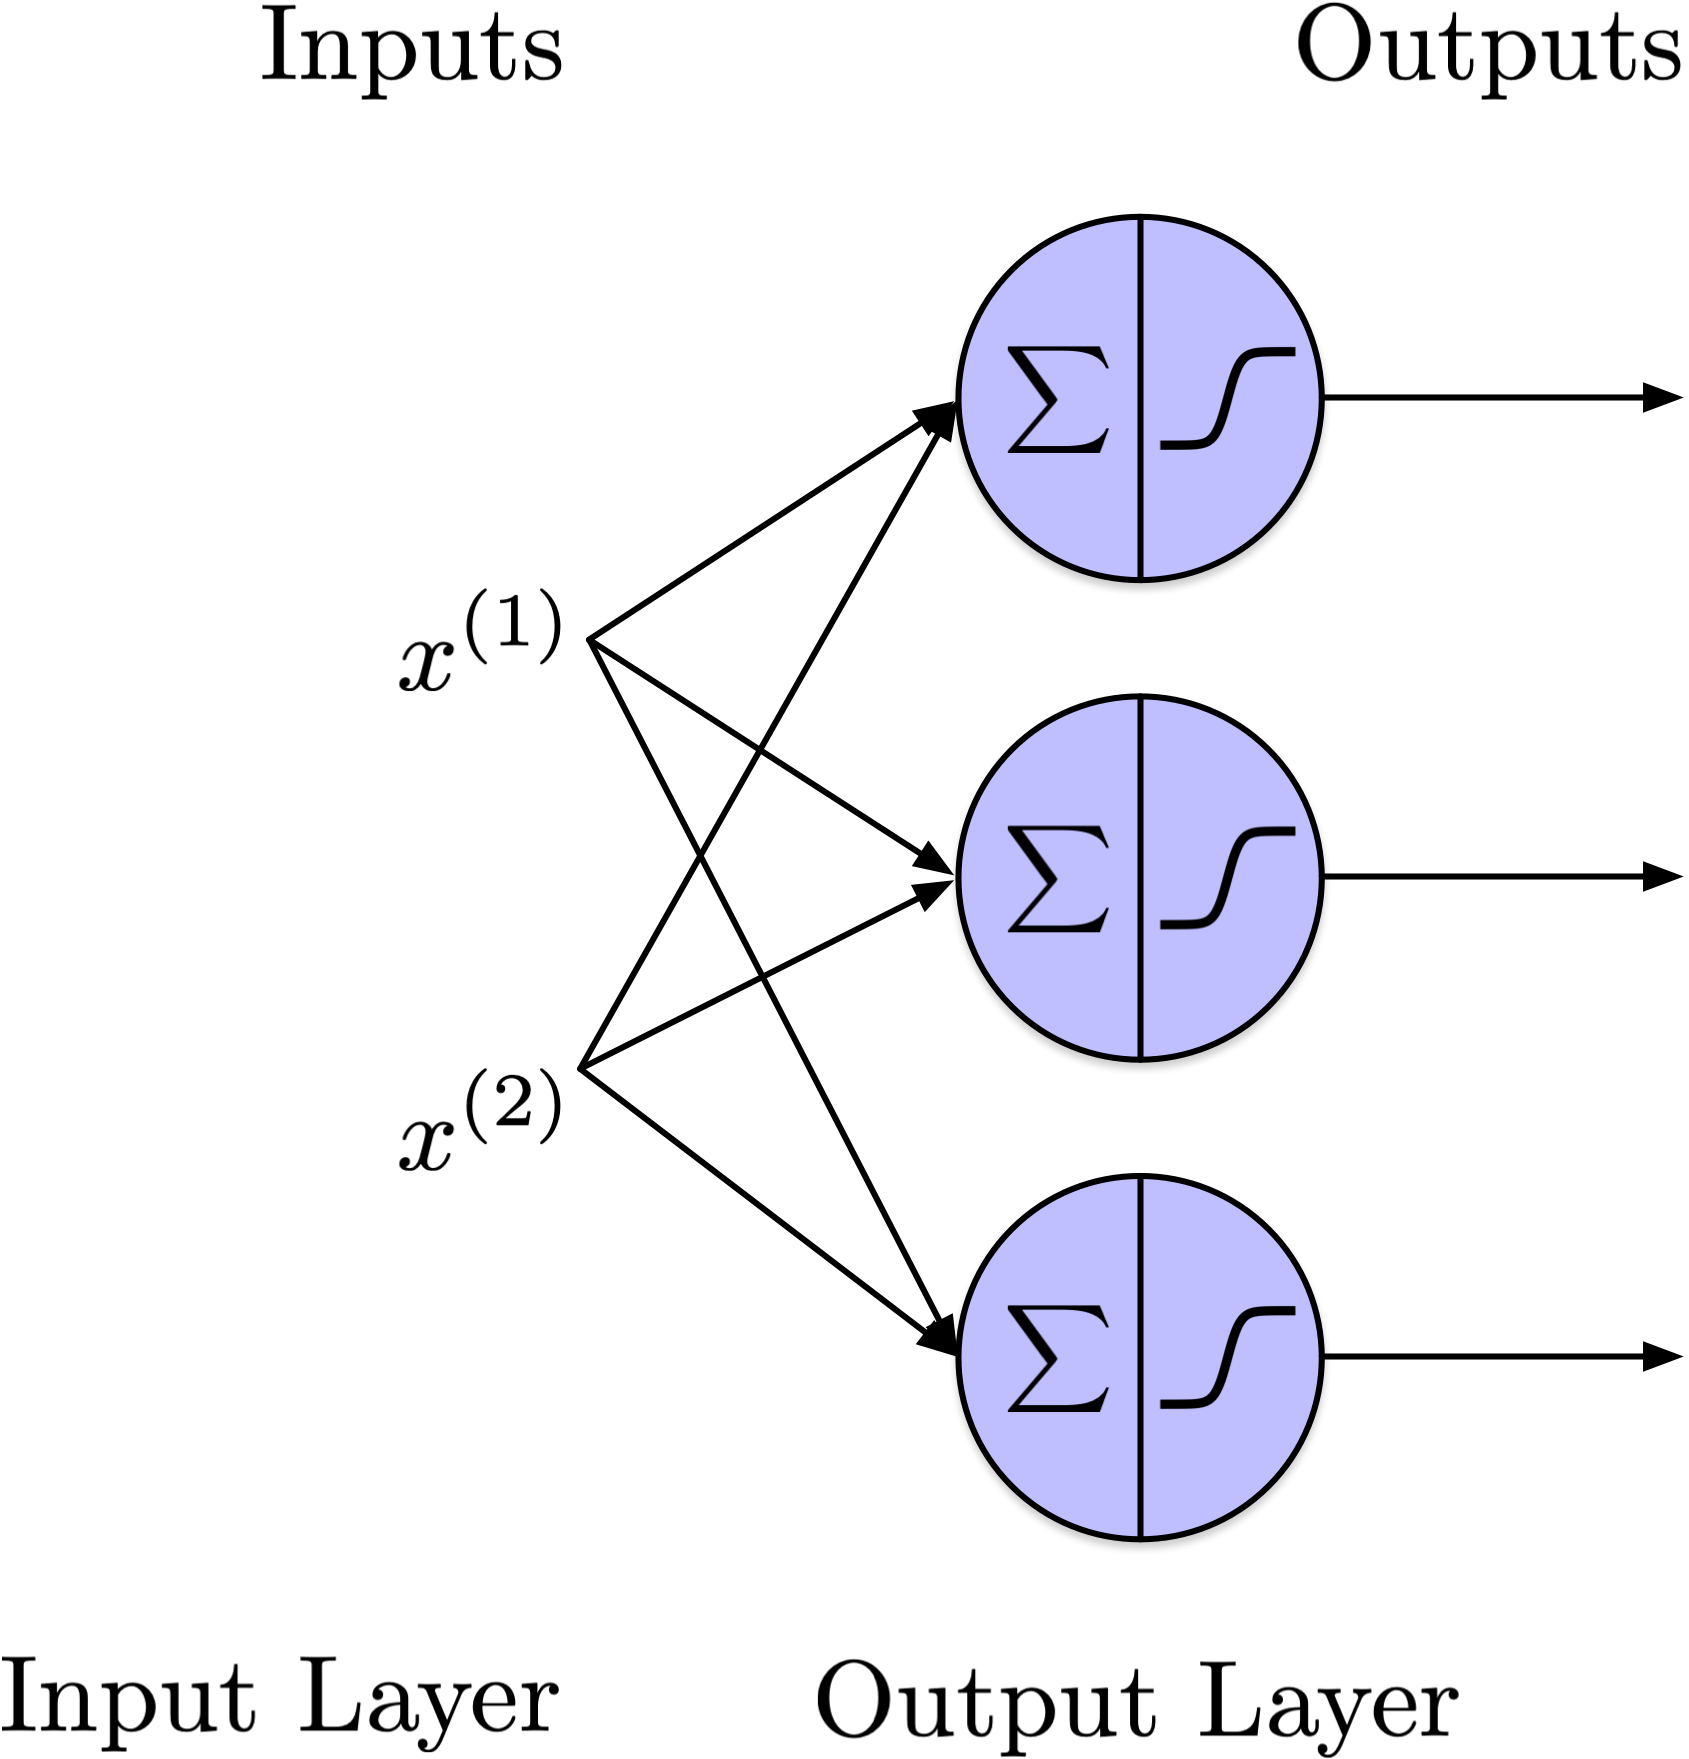

A **perceptron** consists of one or more **threshold logic units**
arranged in a **single layer**, with each unit connected to all inputs.
This configuration is referred to as **fully connected** or **dense**.

Since the threshold logic units in this single layer also generate the
output, it is referred to as the **output layer**.

## Perceptron

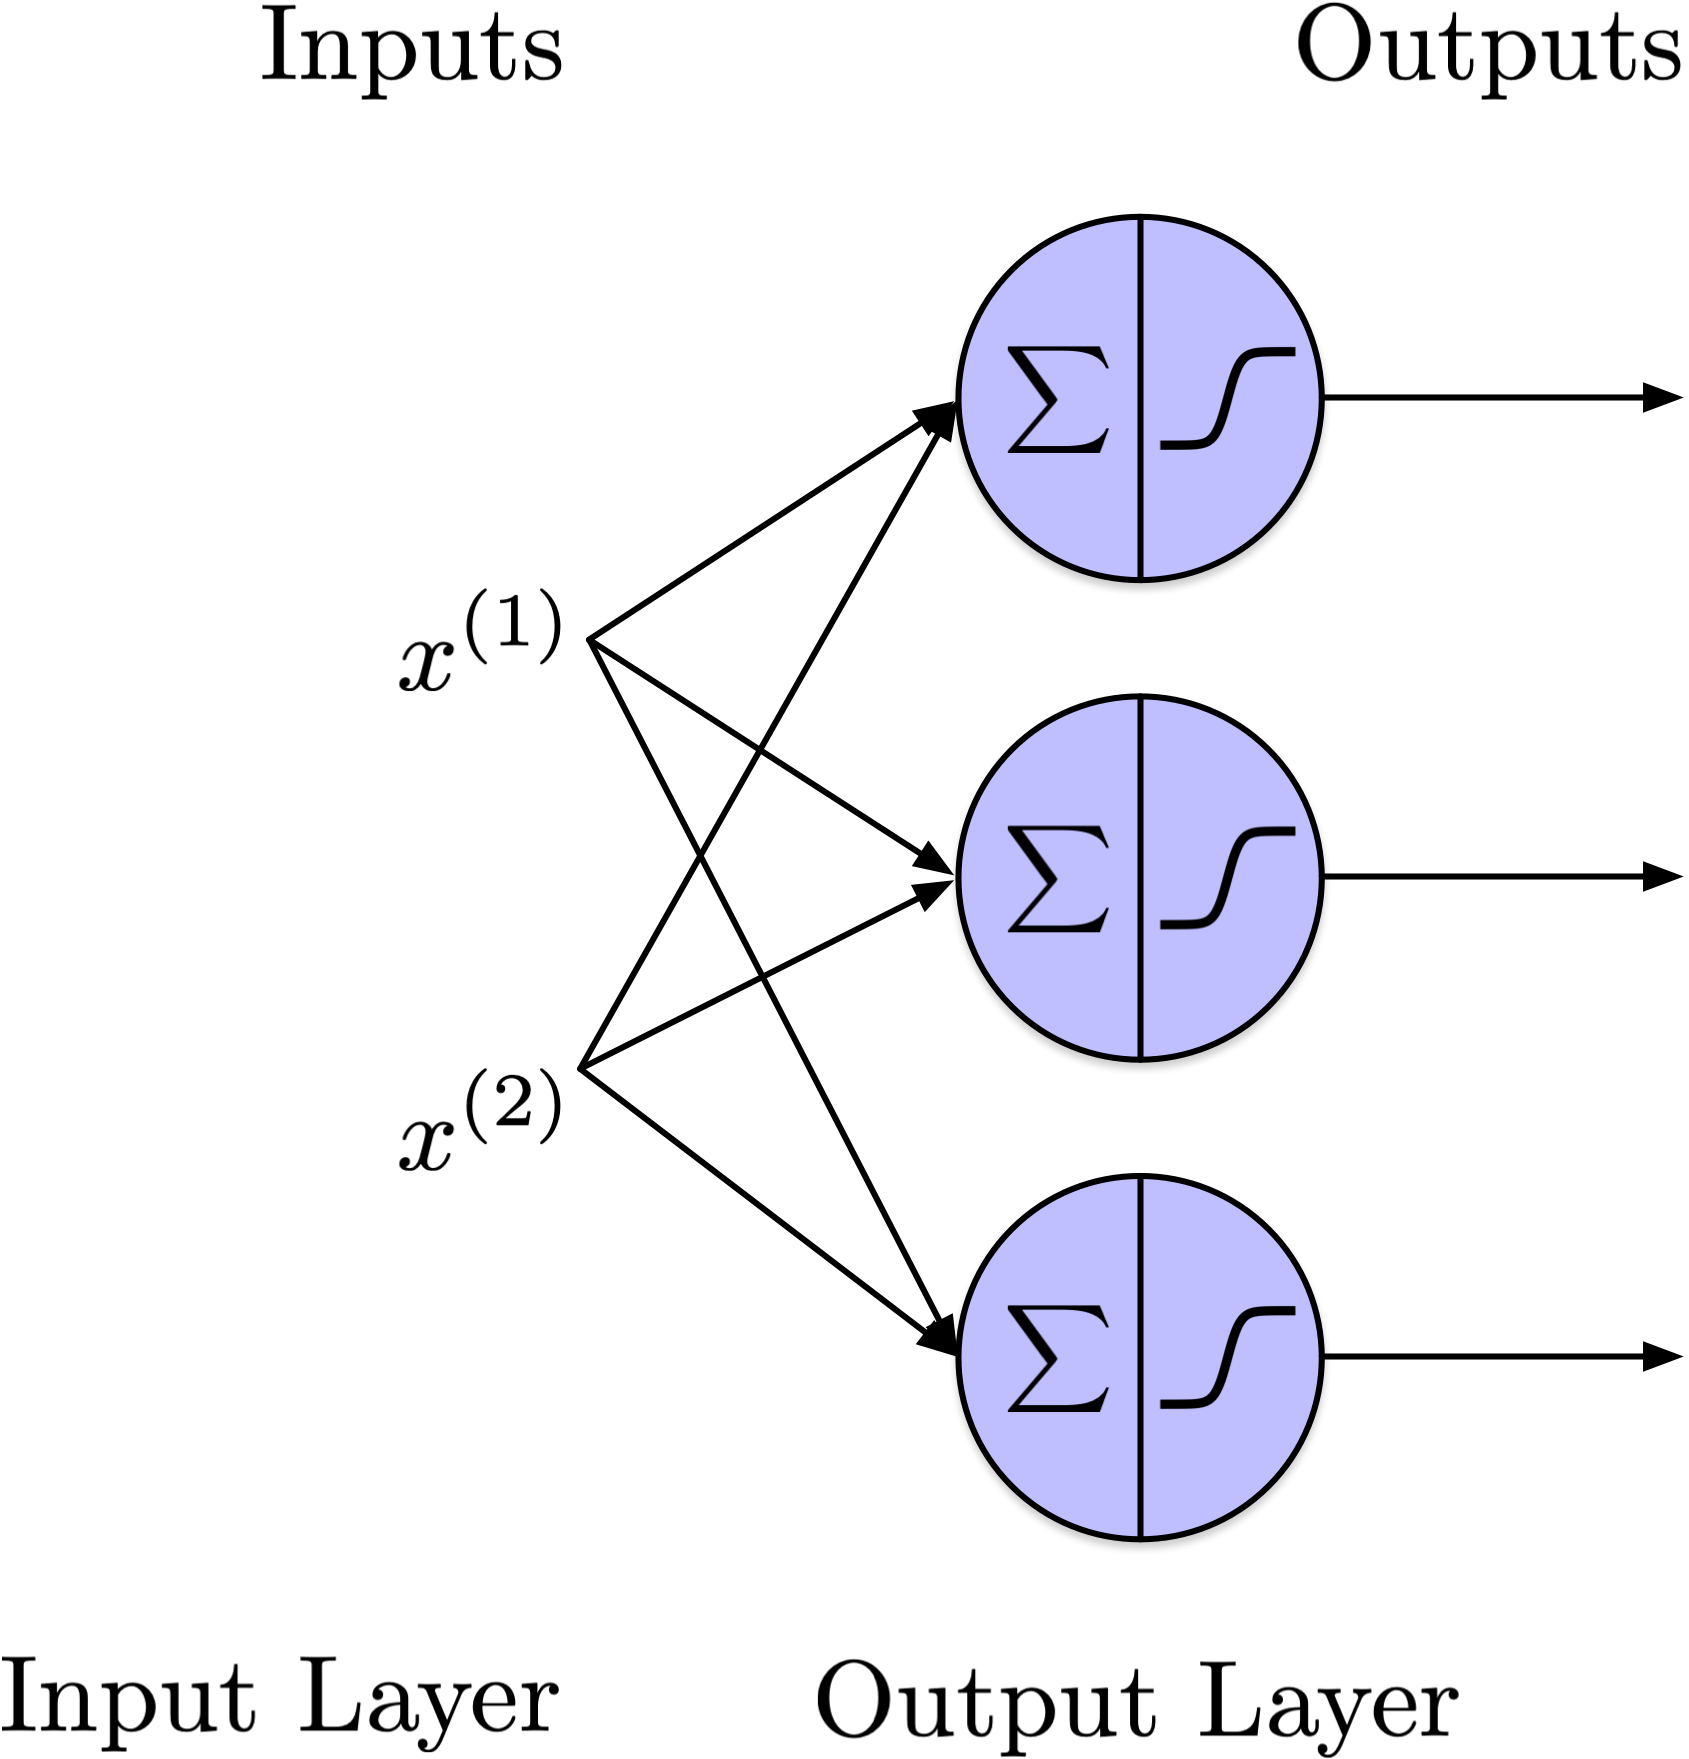

As this perceptron generates multiple outputs simultaneously, it
performs **multiple binary predictions**, making it as a **multilabel
classifier** (can also be used as multiclass classifier).

Classification tasks, can be further divided into **multilabel** and
**multiclass** classification.

1.  **Multiclass Classification:**

    -   In multiclass classification, each instance is assigned to one
        and only one class out of a set of three or more possible
        classes. The classes are mutually exclusive, meaning that an
        instance cannot belong to more than one class at the same time.

    -   **Example:** Classifying an image as either a cat, dog, or bird.
        Each image can only belong to one of these categories.

2.  **Multilabel Classification:**

    -   In multilabel classification, each instance can be associated
        with multiple classes simultaneously. The classes are not
        mutually exclusive, allowing for the possibility that an
        instance can belong to several classes at once.

    -   **Example:** Tagging an image with multiple attributes such as
        “outdoor,” “sunset,” and “beach.” The image can simultaneously
        belong to all these labels.

The key difference lies in the relationship between classes:
**multiclass classification deals with a single label per instance**,
while **multilabel classification handles multiple labels for each
instance**.

## Notation

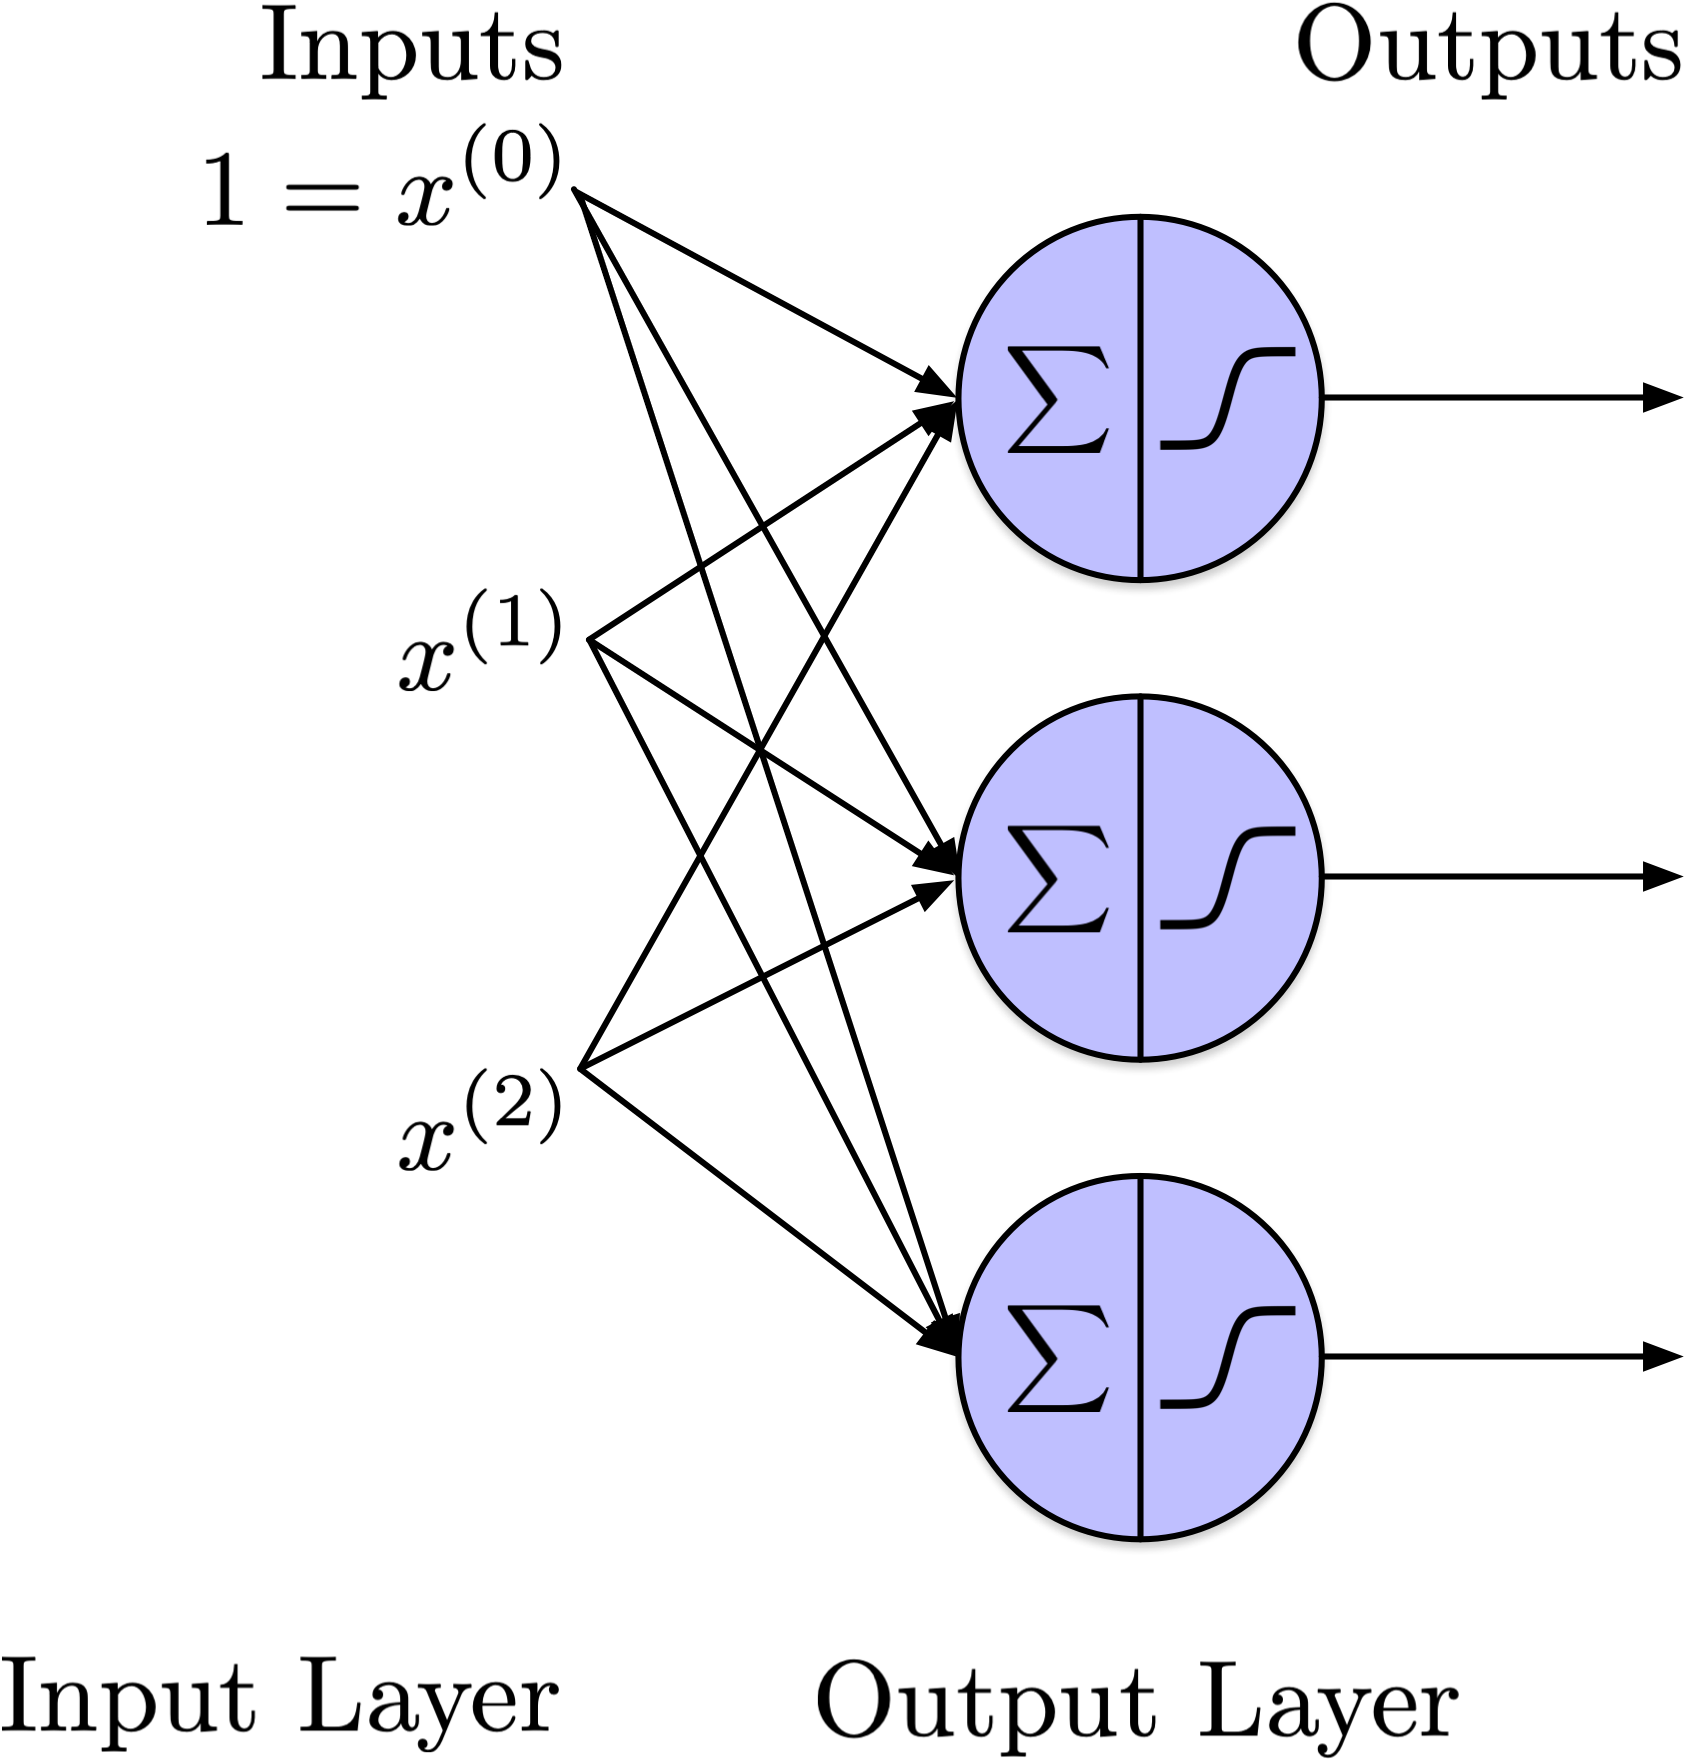

As before, introduce an additional feature with a value of 1 to the
input. **Assign a bias $b$ to each neuron.** Each incoming connection
**implicitly** has an associated weight.

## Notation

-   $X$ is the input **data matrix** where **each row corresponds to an
    example** and **each column represents one of the $D$ features**.

-   $W$ is the **weight matrix**, structured with one **row per input
    (feature)** and **one column per neuron**.

-   **Bias terms** can be represented separately; both approaches appear
    in the literature. Here, $b$ is a vector with a **length equal to
    the number of neurons**.

With neural networks, the **parameters** of the model are often reffered
to as $w$ (vector) or $W$ (matrix), rather than $\theta$.

## Discussion

-   The algorithm to **train** the perceptron closely resembles
    stochastic gradient descent.

    -   In the **interest of time** and to **avoid confusion**, we will
        skip this algorithm and focus on **multilayer perception** (MLP)
        and its training algorithm, **backpropagation**.

## Historical Note and Justification

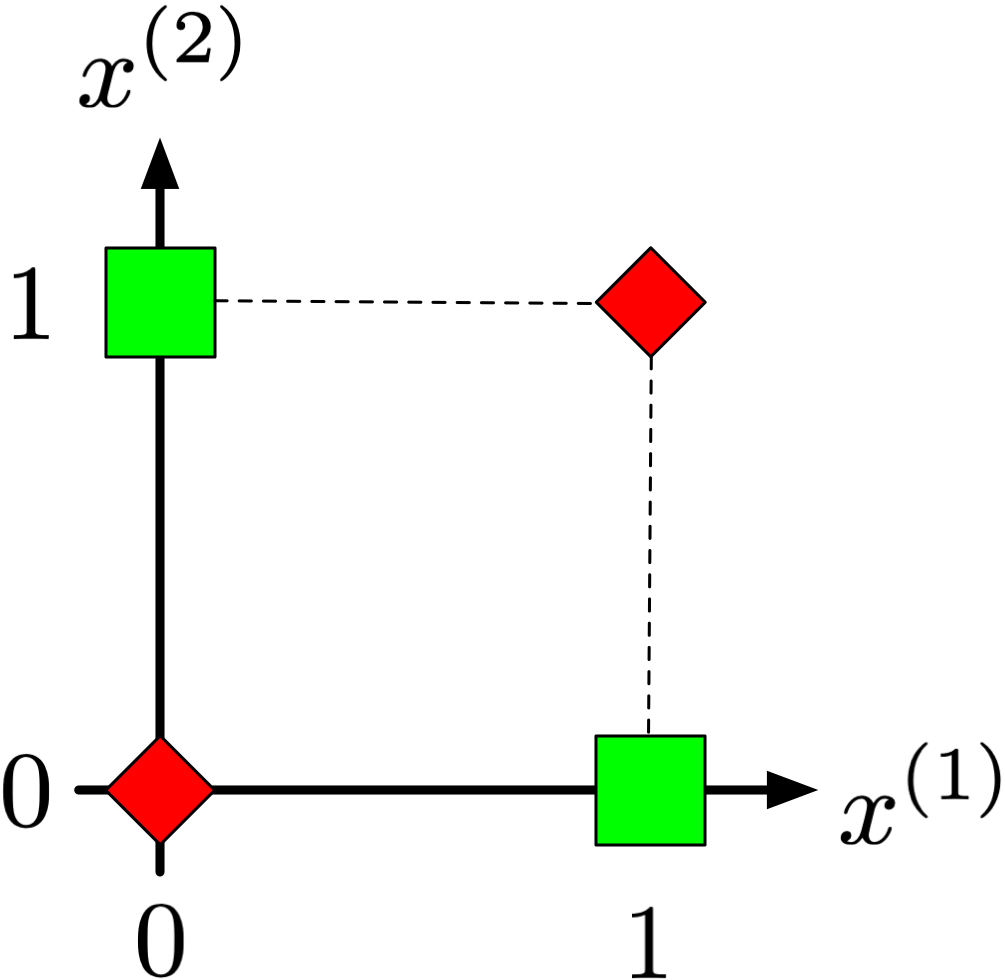

Minsky and Papert (1969) demonstrated the limitations of perceptrons,
notably their inability to solve **exclusive OR** (XOR) classification
problems:
${([0,1],\mathrm{true}), ([1,0],\mathrm{true}), ([0,0],\mathrm{false}), ([1,1],\mathrm{false})}$.

This limitation also applies to other linear classifiers, such as
logistic regression.

Consequently, due to these limitations and a lack of practical
applications, some researchers abandoned the perceptron.

## Multilayer Perceptron

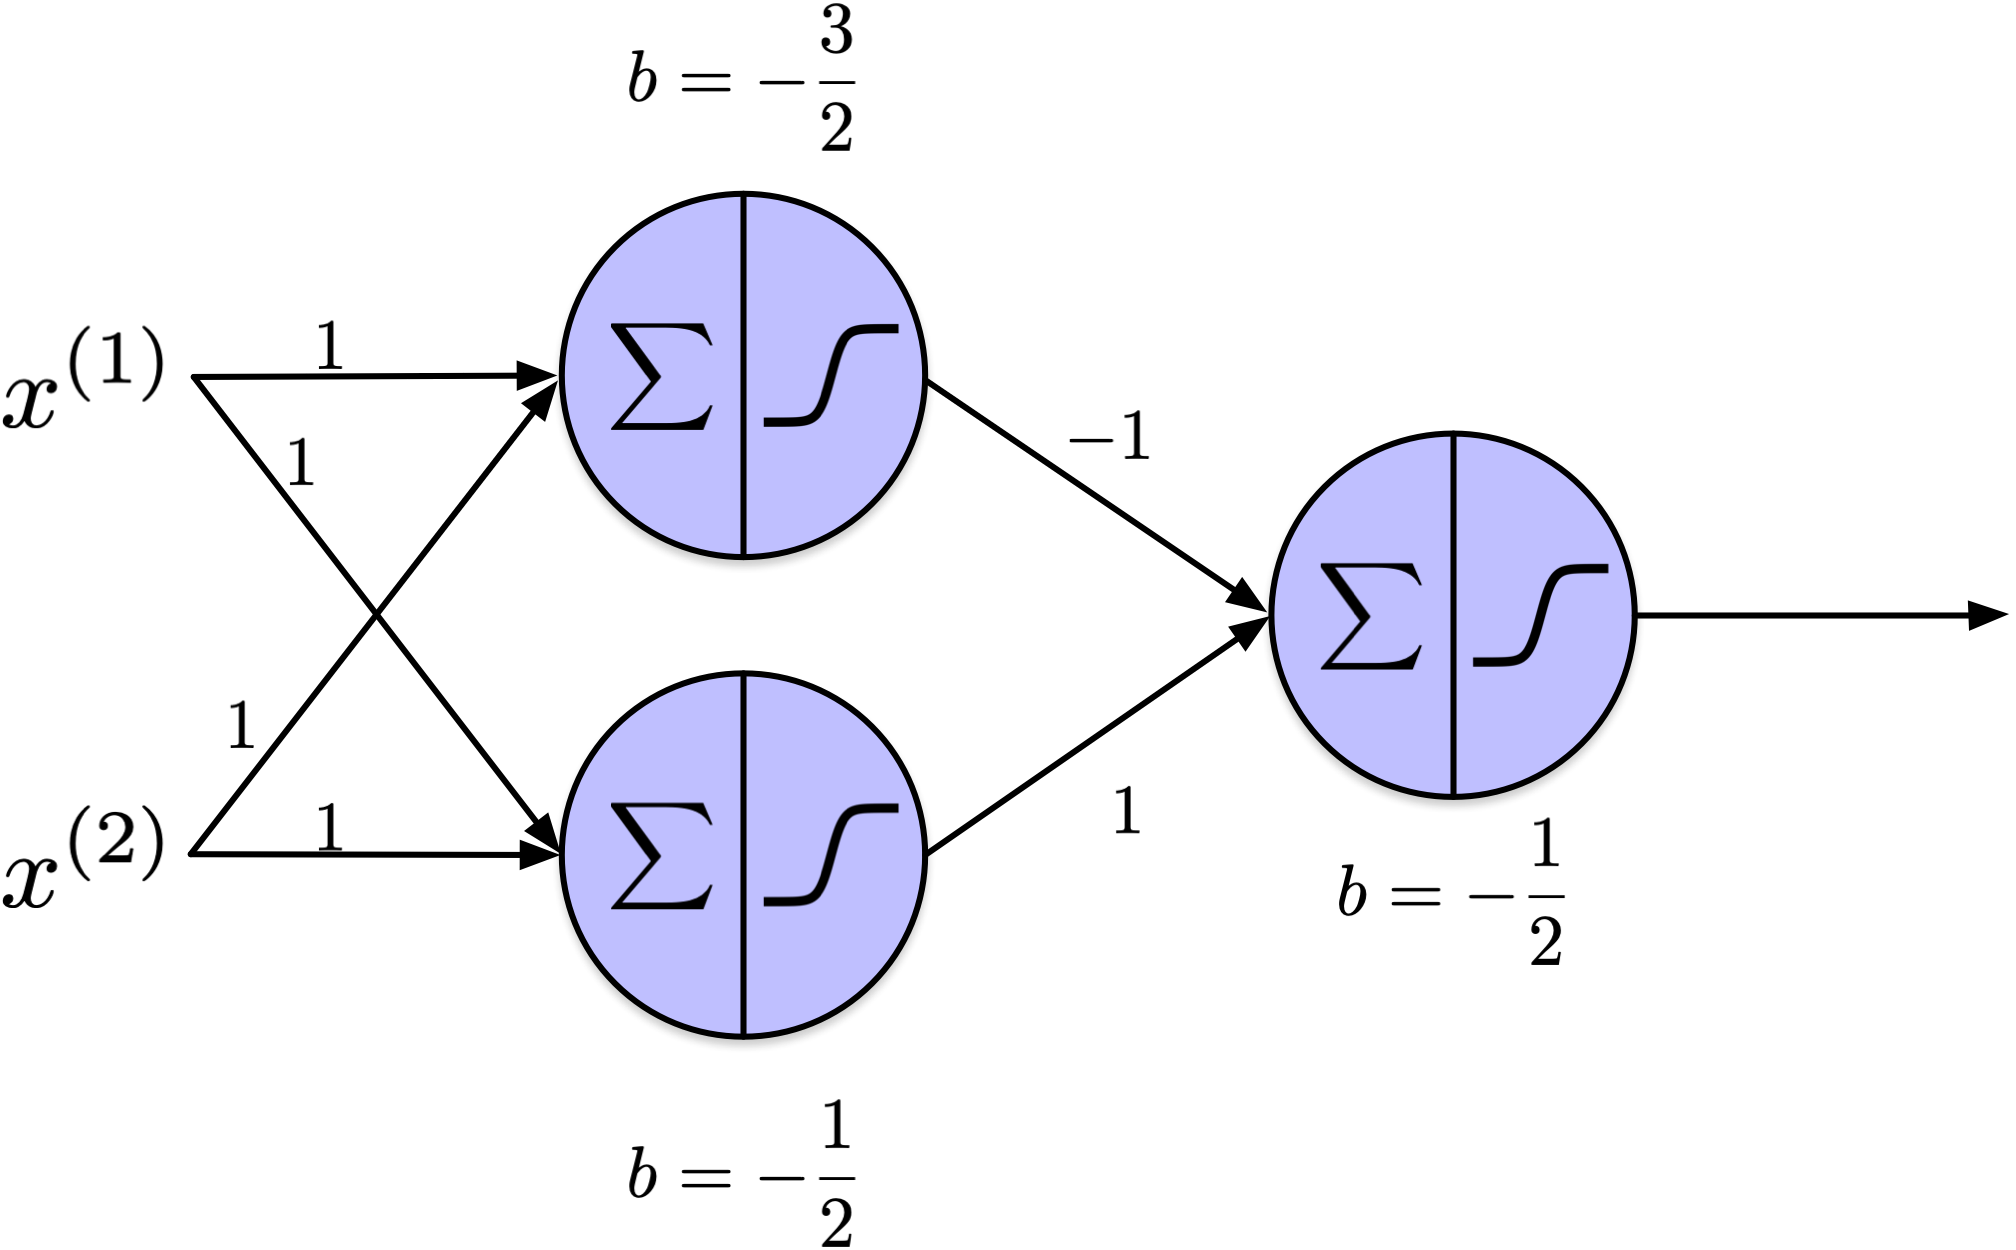

A **multilayer perceptron** (MLP) includes an input layer and one or
more layers of threshold logic units. Layers that are neither input nor
output are termed **hidden layers**.

## XOR Classification problem

| $x^{(1)}$ | $x^{(2)}$ | $y$ | $o_1$ | $o_2$ | $o_3$ |
|-----------|-----------|-----|-------|-------|-------|
| 1         | 0         | 1   | 0     | 1     | 1     |
| 0         | 1         | 1   | 0     | 1     | 1     |
| 0         | 0         | 0   | 0     | 0     | 0     |
| 1         | 1         | 0   | 1     | 1     | 0     |

$x^{(1)}$ and $x^{(2)}$ are two attributes, $y$ is the target, $o_1$,
$o_2$, and $o_3 = h_\theta(x)$, are the output of the top left, bottom
left, and right threshold units. Clearly
$h_\theta(x) = y, \forall x \in X$.

I developed an Excel spreadsheet to verify that the proposed multilayer
perceptron effectively solves the XOR classification problem.

The step function used in the above model is the heavyside function.

## Feedforward Neural Network (FNN)

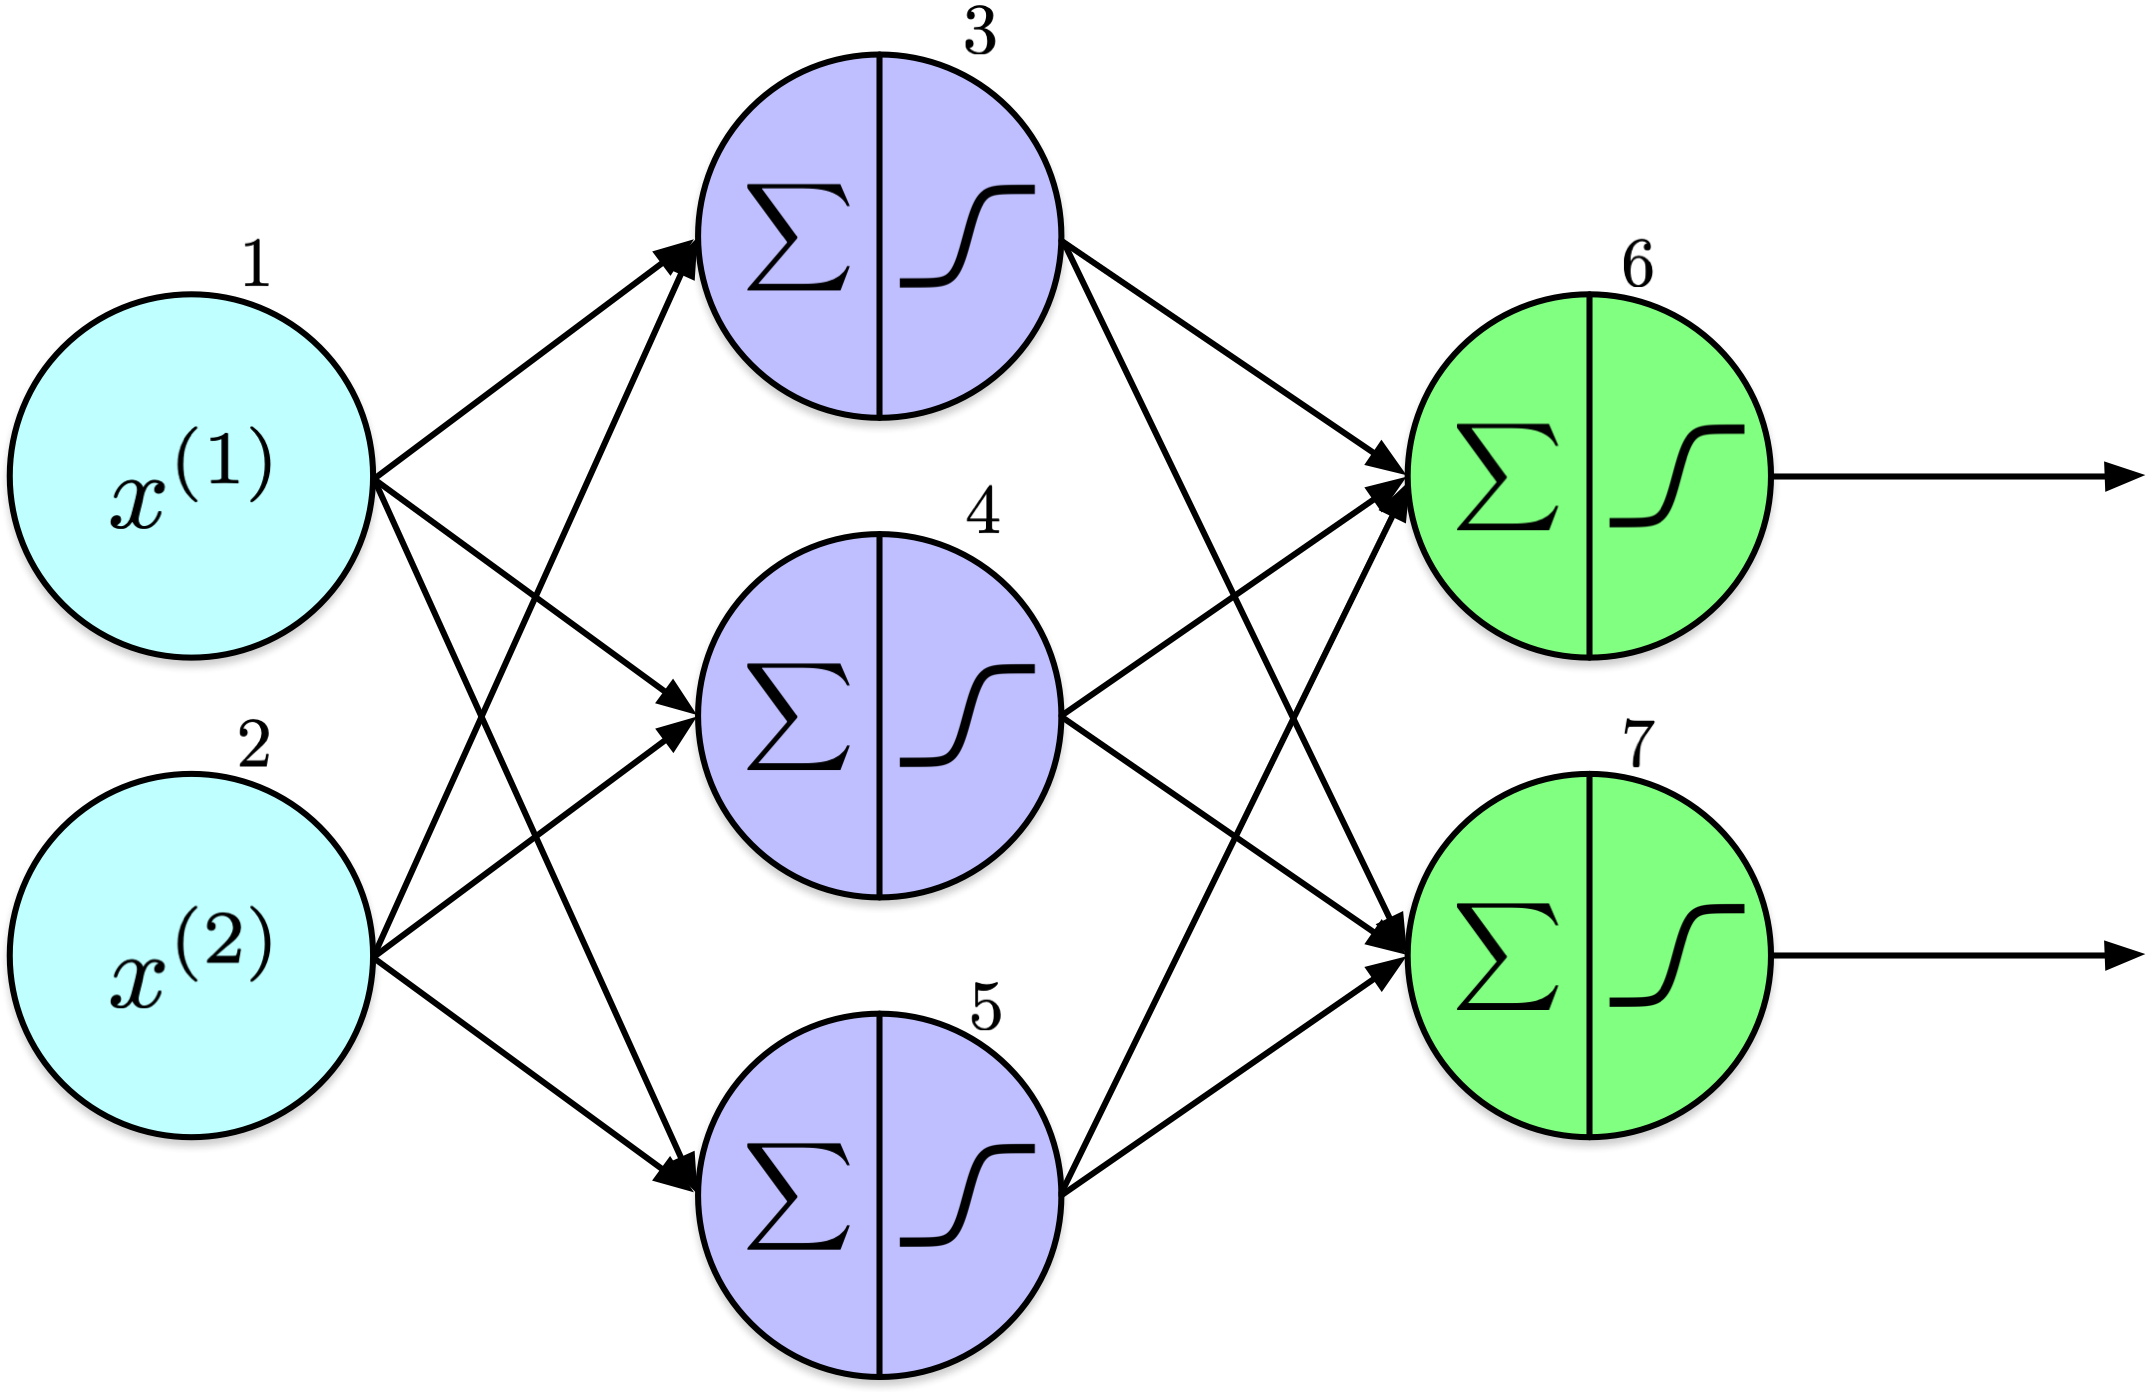

Information in this architecture flows unidirectionally—from left to
right, moving from input to output. Consequently, it is termed a
**feedforward neural network**.

The network consists of **three layers**: input, hidden, and output. The
**input layer** contains two nodes, the **hidden layer** comprises three
nodes, and the **output layer** has two nodes. Additional hidden layers
and nodes per layer can be added, which will be discussed later.

It is often useful to include explicit input nodes that do not perform
calculations, known as **input units** or **input neurons**. These nodes
act as placeholders to introduce input features into the network,
passing data directly to the next layer without transformation. In the
network diagram, these are the light blue nodes on the left, labeled 1
and 2. Typically, **the number of input units corresponds to the number
of features**.

For clarity, nodes are labeled to facilitate discussion of the weights
between them, such as $w_{1,5}$ between nodes 1 and 5. Similarly, the
output of a node is denoted by $o_k$, where $k$ represents the node’s
label. For example, for $k=3$, the output would be $o_3$.

## Forward Pass (Computatation)

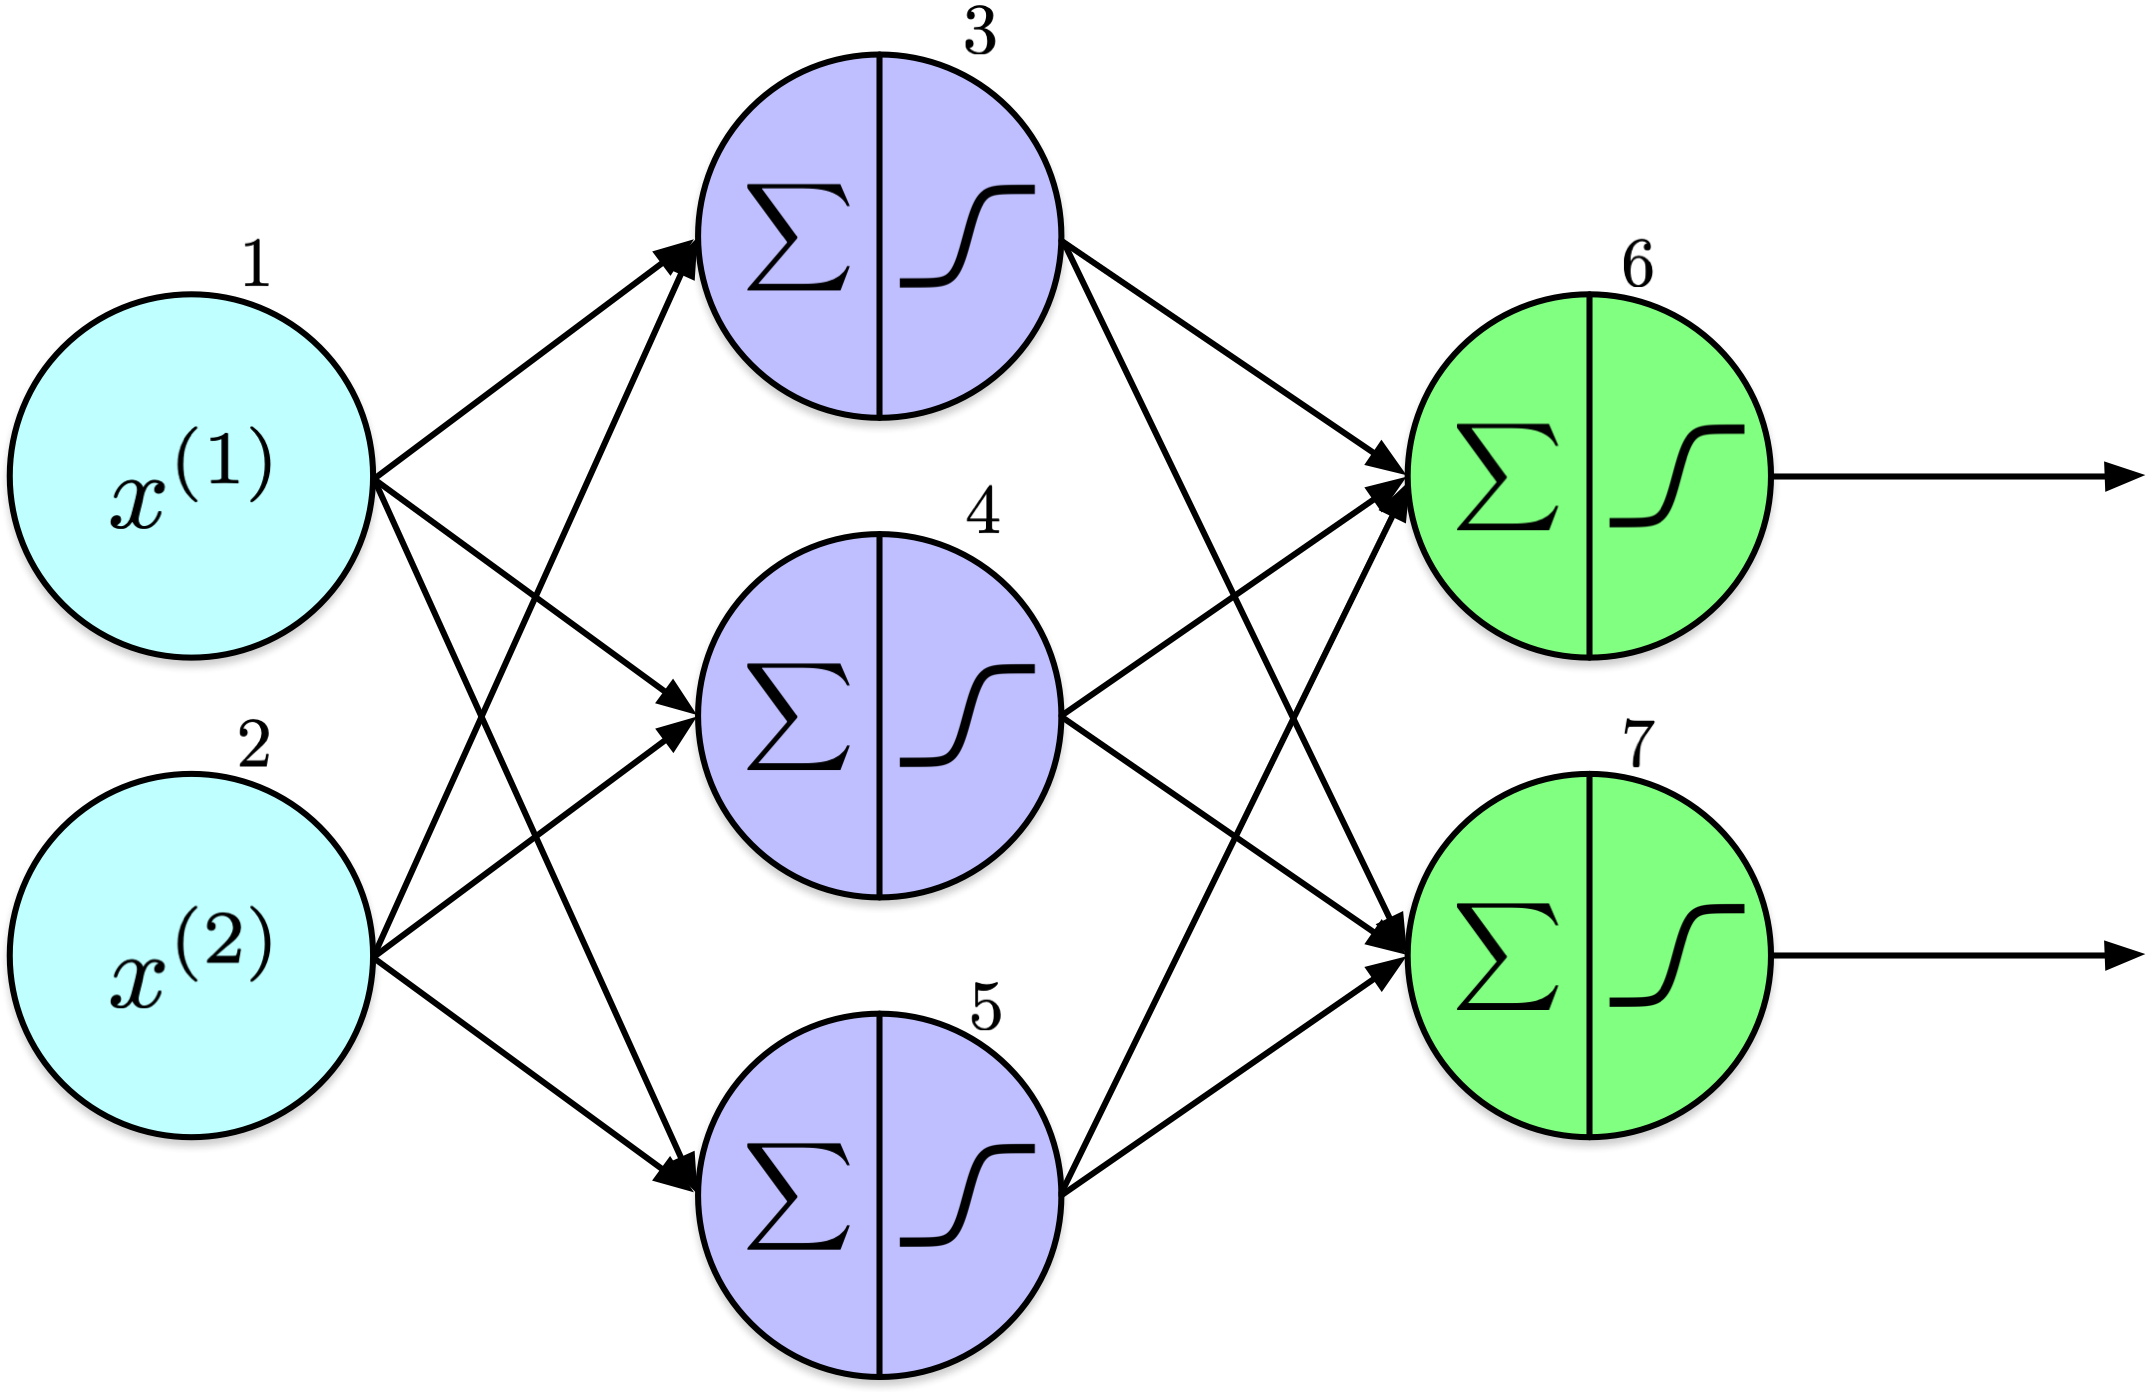

$o3 = \sigma(w_{13} x^{(1)}+ w_{23} x^{(2)} + b_3)$

$o4 = \sigma(w_{14} x^{(1)}+ w_{24} x^{(2)} + b_4)$

$o5 = \sigma(w_{15} x^{(1)}+ w_{25} x^{(2)} + b_5)$

$o6 = \sigma(w_{36} o_3 + w_{46} o_4 + w_{56} o_5 + b_6)$

$o7 = \sigma(w_{37} o_3 + w_{47} o_4 + w_{57} o_5 + b_7)$

First, it’s important to **understand the information flow**: this
network **computes** two outputs from its inputs.

To simplify the figure, I have opted not to display the bias terms,
though they remain crucial components. Specifically, $b_3$ represents
the bias term associated with node 3.

If bias terms were not significant, the training process would naturally
reduce them to zero. Bias terms are essential as they enable the
adjustment of the decision boundary, allowing the model to learn more
complex patterns that weights alone cannot capture. By offering
additional degrees of freedom, they also contribute to faster
convergence during training.

## Forward Pass (Computatation)

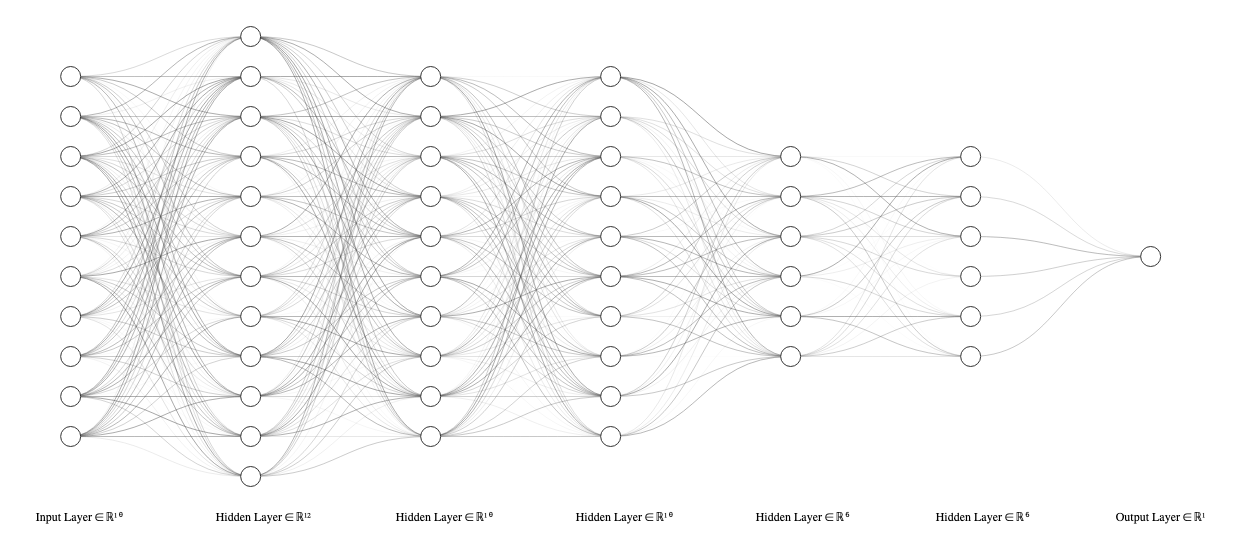

The information flow remains consistent even in more **complex
networks**. Networks with many layers are called **deep neural
networks** (DNN).

Produced using **NN-SVG**, LeNail (2019).

## Forward Pass (Computatation)

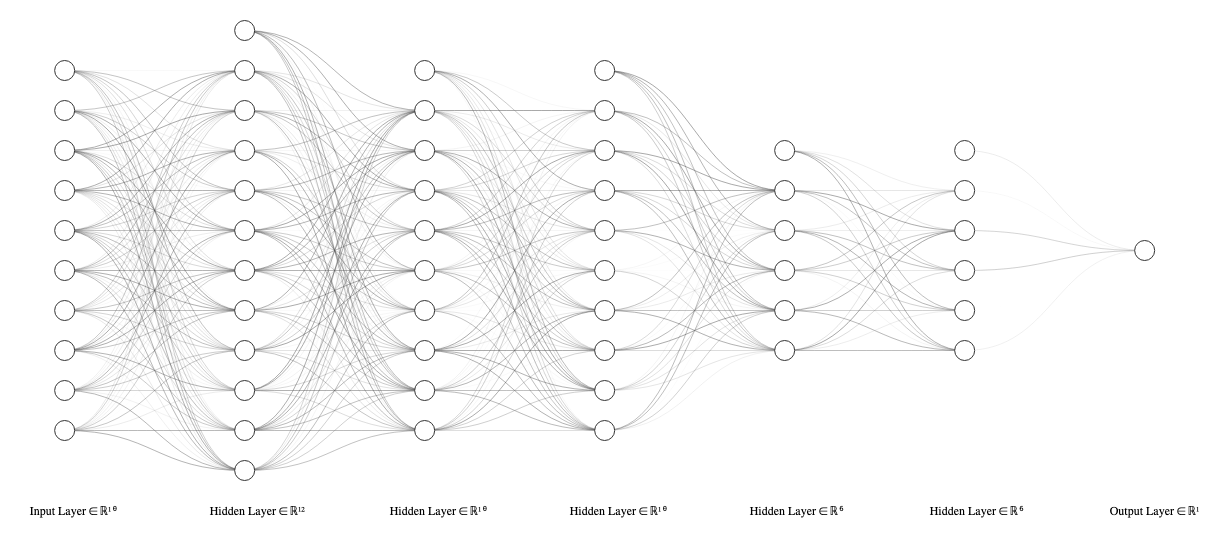

Same network with **bias terms shown**.

Produced using **NN-SVG**, LeNail (2019).

## Activation Function

-   As will be discussed later, the training algorithm, known as
    **backpropagation**, employs **gradient descent**, necessitating the
    calculation of the **partial derivatives of the loss function**.

-   The **step function** in the multilayer perceptron had to be
    replaced, as it consists only of flat surfaces. **Gradient descent
    cannot progress on flat surfaces due to their zero derivative**.

## Activation Function

-   **Nonlinear activation functions are paramount** because, without
    them, multiple layers in the network would only compute a linear
    function of the inputs.

-   According to the **Universal Approximation Theorem**, sufficiently
    large deep networks with nonlinear activation functions can
    **approximate any continuous function**. See [Universal
    Approximation
    Theorem](https://en.wikipedia.org/wiki/Universal_approximation_theorem).

## Sigmoid

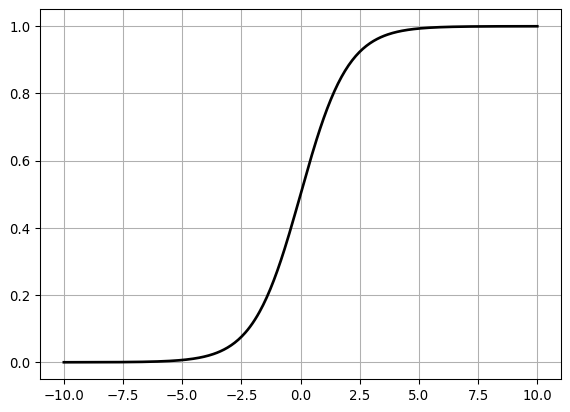

$$
\sigma(t) = \frac{1}{1 + e^{-t}}
$$

## Hyperbolic Tangent Function

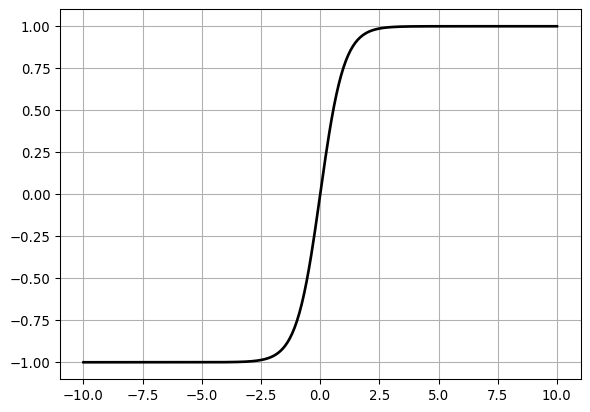

$$
\tanh(t) = 2 \sigma(2t) - 1
$$

This S-shaped curve, similar to the sigmoid function, produces output
values ranging from -1 to 1. According to Géron (2022), this range helps
each layer’s output to be approximately centered around 0 at the start
of training, thereby **accelerating convergence**.

## Rectified linear unit function (ReLU)

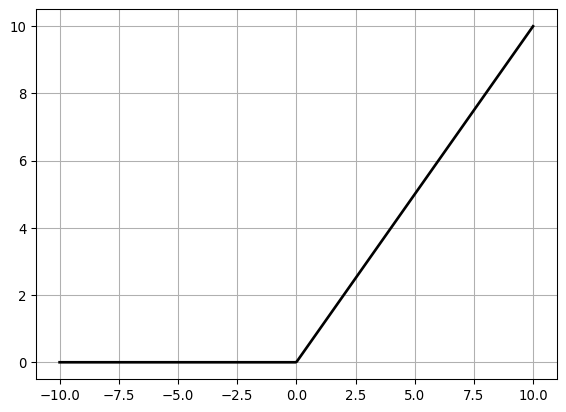

$$
\mathrm{ReLU}(t) = \max(0, t)
$$

Although the **ReLU function** is not differentiable at $t=0$ and has a
derivative of 0 for $t<0$, it performs quite well in practice and is
computationally efficient. Consequently, it has become the **default
activation function**.

## Common Activation Functions

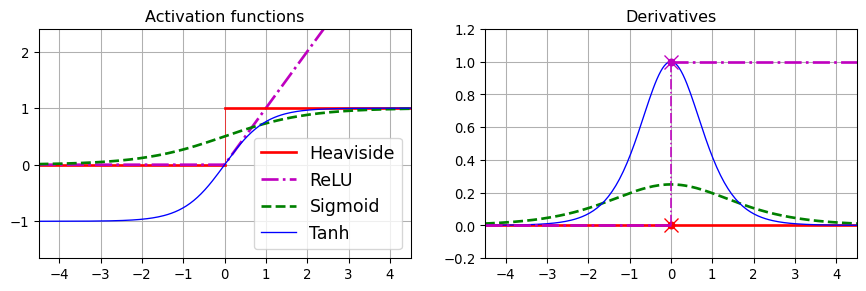

Géron (2022) –
[10_neural_nets_with_keras.ipynb](https://github.com/ageron/handson-ml3/blob/main/10_neural_nets_with_keras.ipynb)

# Let’s code

## Frameworks

[PyTorch](https://pytorch.org/) and
[TensorFlow](https://www.tensorflow.org/) are the leading platforms for
deep learning.

-   PyTorch has gained considerable traction in the **research
    community**. Initially developed by **Meta AI**, it is now part of
    the Linux Foundation.

-   TensorFlow, created by **Google**, is widely adopted in **industry**
    for deploying models in production environments.

## Keras

[Keras](https://keras.io/) is a high-level API designed to build, train,
evaluate, and execute models across various backends, including PyTorch,
TensorFlow, and
[JAX](https://jax.readthedocs.io/en/latest/quickstart.html), Google’s
high-performance platform.

[Keras](https://keras.io/) is powerful enough for most projects.

As highlighted in previous Quotes of the Day, François Chollet, a Google
engineer, is the originator and one of the primary developers of the
Keras project.

## Fashion-MNIST dataset

“[Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist) is a
dataset of [Zalando](https://en.zalando.de/?_rfl=de)’s article
images—consisting of a training set of **60,000 examples** and a test
set of **10,000 examples**. Each example is a **28x28 grayscale image**,
associated with a label from **10 classes**.”

**Attribution**: Géron (2022) –
[10_neural_nets_with_keras.ipynb](https://github.com/ageron/handson-ml3/blob/main/10_neural_nets_with_keras.ipynb)

## Loading

In [6]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

Setting aside 5000 examples as a validation set.

## Exploration

In [7]:
X_train.shape

(55000, 28, 28)

. . .

In [8]:
X_train.dtype

dtype('uint8')

. . .

Transforming the pixel intensities from integers in the range 0 to 255
to floats in the range 0 to 1.

In [9]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

## What are these images anyway!

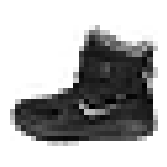

In [10]:
plt.figure(figsize=(2, 2))
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

. . .

In [11]:
y_train

array([9, 0, 0, ..., 9, 0, 2], dtype=uint8)

. . .

Since the labels are integers, 0 to 9. Class names will become handy.

In [12]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

## First 40 images

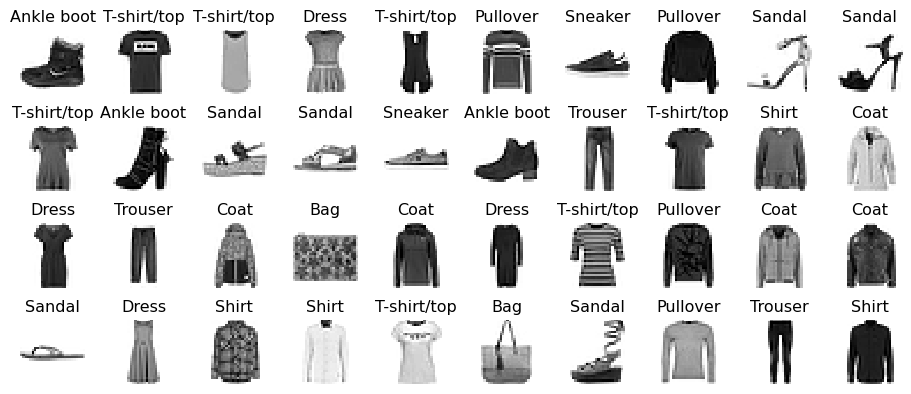

In [13]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Creating a model

In [14]:
tf.random.set_seed(42)

model = tf.keras.Sequential()

model.add(tf.keras.layers.InputLayer(shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

## `model.summary()`

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type) ┃ Output Shape ┃ Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 ( Flatten ) │ ( None , 784 ) │ 0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 ( Dense ) │ ( None , 300 ) │ 235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 ( Dense ) │ ( None , 100 ) │ 30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 ( Dense ) │ ( None , 10 ) │ 1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

Total params: 266,610 (1.02 MB)

Trainable params: 266,610 (1.02 MB)

Non-trainable params: 0 (0.00 B)

As observed, `dense_3` has $235,500$ parameters, while
$784 \times 300 = 235,200$.

Could you explain the origin of the additional parameters?

Similarly, `dense_3` has $30,100$ parameters, while
$300 \times 100 = 30,000$.

Can you explain why?

## Creating a model (alternative)

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

/Users/turcotte/opt/micromamba/envs/ai/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


## `model.summary()`

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type) ┃ Output Shape ┃ Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten ( Flatten ) │ ( None , 784 ) │ 0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense ( Dense ) │ ( None , 300 ) │ 235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 ( Dense ) │ ( None , 100 ) │ 30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 ( Dense ) │ ( None , 10 ) │ 1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

Total params: 266,610 (1.02 MB)

Trainable params: 266,610 (1.02 MB)

Non-trainable params: 0 (0.00 B)

## Compiling the model

In [19]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

`sparse_categorical_crossentropy` is the appropriate function for a
multiclass classification problem (more later).

The method `compile` allows to set the loss function, as well as other
parameters. Keras then prepares the model for training.

## Training the model

In [20]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
   1/1719 ━━━━━━━━━━━━━━━━━━━━ 3:27 121ms/step - accuracy: 0.0312 - loss: 2.3219  69/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 738us/step - accuracy: 0.3008 - loss: 2.0548   138/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 735us/step - accuracy: 0.4033 - loss: 1.8548 210/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 722us/step - accuracy: 0.4589 - loss: 1.7108 281/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 719us/step - accuracy: 0.4946 - loss: 1.6054 353/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - accuracy: 0.5210 - loss: 1.5216 417/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/step - 

The model is provided with both a taining set and a validation set. At
each step, the model will report its performance on both sets. This will
also allow to visualize the accuracy and loss curves on both sets (more
later).

When calling the `fit` method in Keras (or similar frameworks), each
step corresponds to the evaluation of a mini-batch. A mini-batch is a
subset of the training data, and during each step, the model updates its
weights based on the error calculated from this mini-batch.

An epoch is defined as one complete pass through the entire training
dataset. During an epoch, the model processes multiple mini-batches
until it has seen all the training data once. This process is repeated
for a specified number of epochs to optimize the model’s performance.

## Visualization

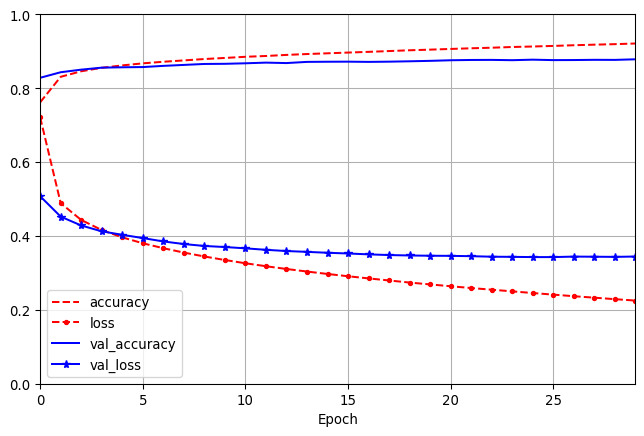

In [21]:
import pandas as pd 

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")  # extra code
plt.show()

## Evaluating the model on our test

In [22]:
model.evaluate(X_test, y_test)

  1/313 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8750 - loss: 0.4466123/313 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step - accuracy: 0.8806 - loss: 0.3488256/313 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step - accuracy: 0.8762 - loss: 0.3593313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step - accuracy: 0.8759 - loss: 0.3593

[0.3581799566745758, 0.8751999735832214]

## Making predictions

In [23]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.14, 0.  , 0.01, 0.  , 0.85],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

. . .

In [24]:
y_pred = y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1])

. . .

In [25]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

As can be seen, the predictions are unambiguous, with only one class per
prediction exhibiting a high value.

## Predicted vs Observed

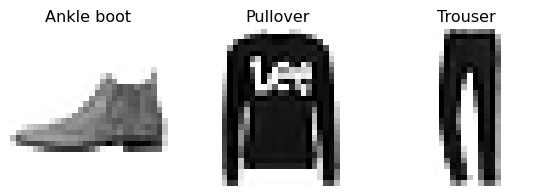

In [27]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

# Prologue

## Summary

-   **Introduction to Neural Networks and Connectionism**
    -   Shift from symbolic AI to connectionist approaches in artificial
        intelligence.
    -   Inspiration from biological neural networks and the human
        brain’s structure.
-   **Computations with Neurodes and Threshold Logic Units**
    -   Early models of neurons (neurodes) capable of performing logical
        operations (AND, OR, NOT).
    -   Limitations of simple perceptrons in solving non-linearly
        separable problems like XOR.
-   **Multilayer Perceptrons (MLPs) and Feedforward Neural Networks
    (FNNs)**
    -   Overcoming perceptron limitations by introducing hidden layers.
    -   Structure and information flow in feedforward neural networks.
    -   Explanation of forward pass computations in neural networks.
-   **Activation Functions in Neural Networks**
    -   Importance of nonlinear activation functions (sigmoid, tanh,
        ReLU) for enabling learning of complex patterns.
    -   Role of activation functions in backpropagation and gradient
        descent optimization.
    -   Universal Approximation Theorem and its implications for neural
        networks.
-   **Deep Learning Frameworks**
    -   Overview of PyTorch and TensorFlow as leading platforms for deep
        learning.
    -   Introduction to Keras as a high-level API for building and
        training neural networks.
    -   Discussion on the suitability of different frameworks for
        research and industry applications.
-   **Hands-On Implementation with Keras**
    -   Loading and exploring the Fashion-MNIST dataset.
    -   Building a neural network model using Keras’ Sequential API.
    -   Compiling the model with appropriate loss functions and
        optimizers for multiclass classification.
    -   Training the model and visualizing training and validation
        metrics over epochs.
    -   Evaluating model performance on test data and interpreting
        results.
-   **Making Predictions and Interpreting Results**
    -   Using the trained model to make predictions on new data.
    -   Visualizing predictions alongside actual images and labels.
    -   Understanding the output probabilities and class assignments in
        the context of the dataset.

## Next lecture

-   We will introduce various architectures of artificial neural
    networks.

## References

Géron, Aurélien. 2022. *Hands-on Machine Learning with Scikit-Learn,
Keras, and TensorFlow*. 3rd ed. O’Reilly Media, Inc.

Goodfellow, Ian, Yoshua Bengio, and Aaron Courville. 2016. *Deep
Learning*. Adaptive Computation and Machine Learning. MIT Press.
<https://dblp.org/rec/books/daglib/0040158>.

LeCun, Yann, Yoshua Bengio, and Geoffrey Hinton. 2015. “Deep Learning.”
*Nature* 521 (7553): 436–44. <https://doi.org/10.1038/nature14539>.

LeNail, Alexander. 2019. “NN-SVG: Publication-Ready Neural Network
Architecture Schematics.” *Journal of Open Source Software* 4 (33): 747.
<https://doi.org/10.21105/joss.00747>.

McCulloch, Warren S, and Walter Pitts. 1943. “<span class="nocase">A
logical calculus of the ideas immanent in nervous activity</span>.” *The
Bulletin of Mathematical Biophysics* 5 (4): 115–33.
<https://doi.org/10.1007/bf02478259>.

Minsky, Marvin, and Seymour Papert. 1969. *Perceptrons: An Introduction
to Computational Geometry*. Cambridge, MA, USA: MIT Press.

Rosenblatt, F. 1958. “<span class="nocase">The perceptron: A
probabilistic model for information storage and organization in the
brain.</span>” *Psychological Review* 65 (6): 386–408.
<https://doi.org/10.1037/h0042519>.

Russell, Stuart, and Peter Norvig. 2020. *Artificial Intelligence: A
Modern Approach*. 4th ed. Pearson. <http://aima.cs.berkeley.edu/>.

------------------------------------------------------------------------

Marcel **Turcotte**

<Marcel.Turcotte@uOttawa.ca>

School of Electrical Engineering and **Computer Science** (EE**CS**)

University of Ottawa